# Finance Data Analysis



In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time
import seaborn as sns 

plt.style.use('fivethirtyeight') #default body style for plots
pd.set_option('display.max_columns', 500) #show up to 500 columns of database - does not hide
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"] #adds the default colours from the style used
%matplotlip inline


UsageError: Line magic function `%matplotlip` not found.


# 1. Import Finance Database

In [352]:
finance = pd.read_csv("Finance_data.csv")

# 2. Explore economic data 

In [353]:
finance.head(10)

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,Stock_Marktet,Factor,Objective,Purpose,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,Yes,Returns,Capital Appreciation,Wealth Creation,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,No,Locking Period,Capital Appreciation,Wealth Creation,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,Yes,Returns,Capital Appreciation,Wealth Creation,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,Yes,Returns,Income,Wealth Creation,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,No,Returns,Income,Wealth Creation,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet
5,Female,24,No,7,5,4,6,3,1,2,No,Risk,Capital Appreciation,Wealth Creation,1-3 years,Daily,30%-40%,Mutual Fund,Retirement Plan,Liquidity,Fund Diversification,Safe Investment,Risk Free,Internet
6,Female,27,Yes,3,6,4,2,5,1,7,Yes,Returns,Capital Appreciation,Wealth Creation,3-5 years,Monthly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,High Interest Rates,Financial Consultants
7,Male,21,Yes,2,3,7,4,6,1,5,Yes,Risk,Capital Appreciation,Wealth Creation,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Newspapers and Magazines
8,Male,35,Yes,2,4,7,5,3,1,6,Yes,Returns,Growth,Savings for Future,1-3 years,Weekly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Fund Diversification,Safe Investment,Fixed Returns,Television
9,Male,31,Yes,1,3,7,4,5,2,6,Yes,Returns,Capital Appreciation,Wealth Creation,3-5 years,Monthly,30%-40%,Fixed Deposits,Retirement Plan,Capital Appreciation,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines


In [354]:
finance.columns

Index(['gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold',
       'Stock_Marktet', 'Factor', 'Objective', 'Purpose', 'Duration',
       'Invest_Monitor', 'Expect', 'Avenue',
       'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual',
       'Reason_Bonds', 'Reason_FD', 'Source'],
      dtype='object')

In [355]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 12  Objective 

In [356]:
finance.duplicated().sum()
#No duplicates within the database

0

In [357]:
finance.isnull().sum()

gender                               0
age                                  0
Investment_Avenues                   0
Mutual_Funds                         0
Equity_Market                        0
Debentures                           0
Government_Bonds                     0
Fixed_Deposits                       0
PPF                                  0
Gold                                 0
Stock_Marktet                        0
Factor                               0
Objective                            0
Purpose                              0
Duration                             0
Invest_Monitor                       0
Expect                               0
Avenue                               0
What are your savings objectives?    0
Reason_Equity                        0
Reason_Mutual                        0
Reason_Bonds                         0
Reason_FD                            0
Source                               0
dtype: int64

In [358]:
finance.shape

(40, 24)

- There are no null values or duplicates, we can proceed to data exploration.

In [359]:
for column_name, dtype in finance.dtypes.items():
    if dtype == 'object':
        unique_values = finance[column_name].unique()
        print(f"Column: {column_name}, Data Type: {dtype}, Unique Values: {unique_values}")

Column: gender, Data Type: object, Unique Values: ['Female' 'Male']
Column: Investment_Avenues, Data Type: object, Unique Values: ['Yes' 'No']
Column: Stock_Marktet, Data Type: object, Unique Values: ['Yes' 'No']
Column: Factor, Data Type: object, Unique Values: ['Returns' 'Locking Period' 'Risk']
Column: Objective, Data Type: object, Unique Values: ['Capital Appreciation' 'Income' 'Growth']
Column: Purpose, Data Type: object, Unique Values: ['Wealth Creation' 'Savings for Future' 'Returns']
Column: Duration, Data Type: object, Unique Values: ['1-3 years' 'More than 5 years' '3-5 years' 'Less than 1 year']
Column: Invest_Monitor, Data Type: object, Unique Values: ['Monthly' 'Weekly' 'Daily']
Column: Expect, Data Type: object, Unique Values: ['20%-30%' '10%-20%' '30%-40%']
Column: Avenue, Data Type: object, Unique Values: ['Mutual Fund' 'Equity' 'Fixed Deposits' 'Public Provident Fund']
Column: What are your savings objectives?, Data Type: object, Unique Values: ['Retirement Plan' 'Heal

- Columns' type seems to be correct
- Change the name of What are your savings objectives? column to Savings_Objectives

In [360]:
finance= finance.rename(columns={'What are your savings objectives?':'Savings_Objectives'})
finance.columns

Index(['gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold',
       'Stock_Marktet', 'Factor', 'Objective', 'Purpose', 'Duration',
       'Invest_Monitor', 'Expect', 'Avenue', 'Savings_Objectives',
       'Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD',
       'Source'],
      dtype='object')

# Visualise the relationships between the features 

Evaluate the prensence of outliers in the numerical features

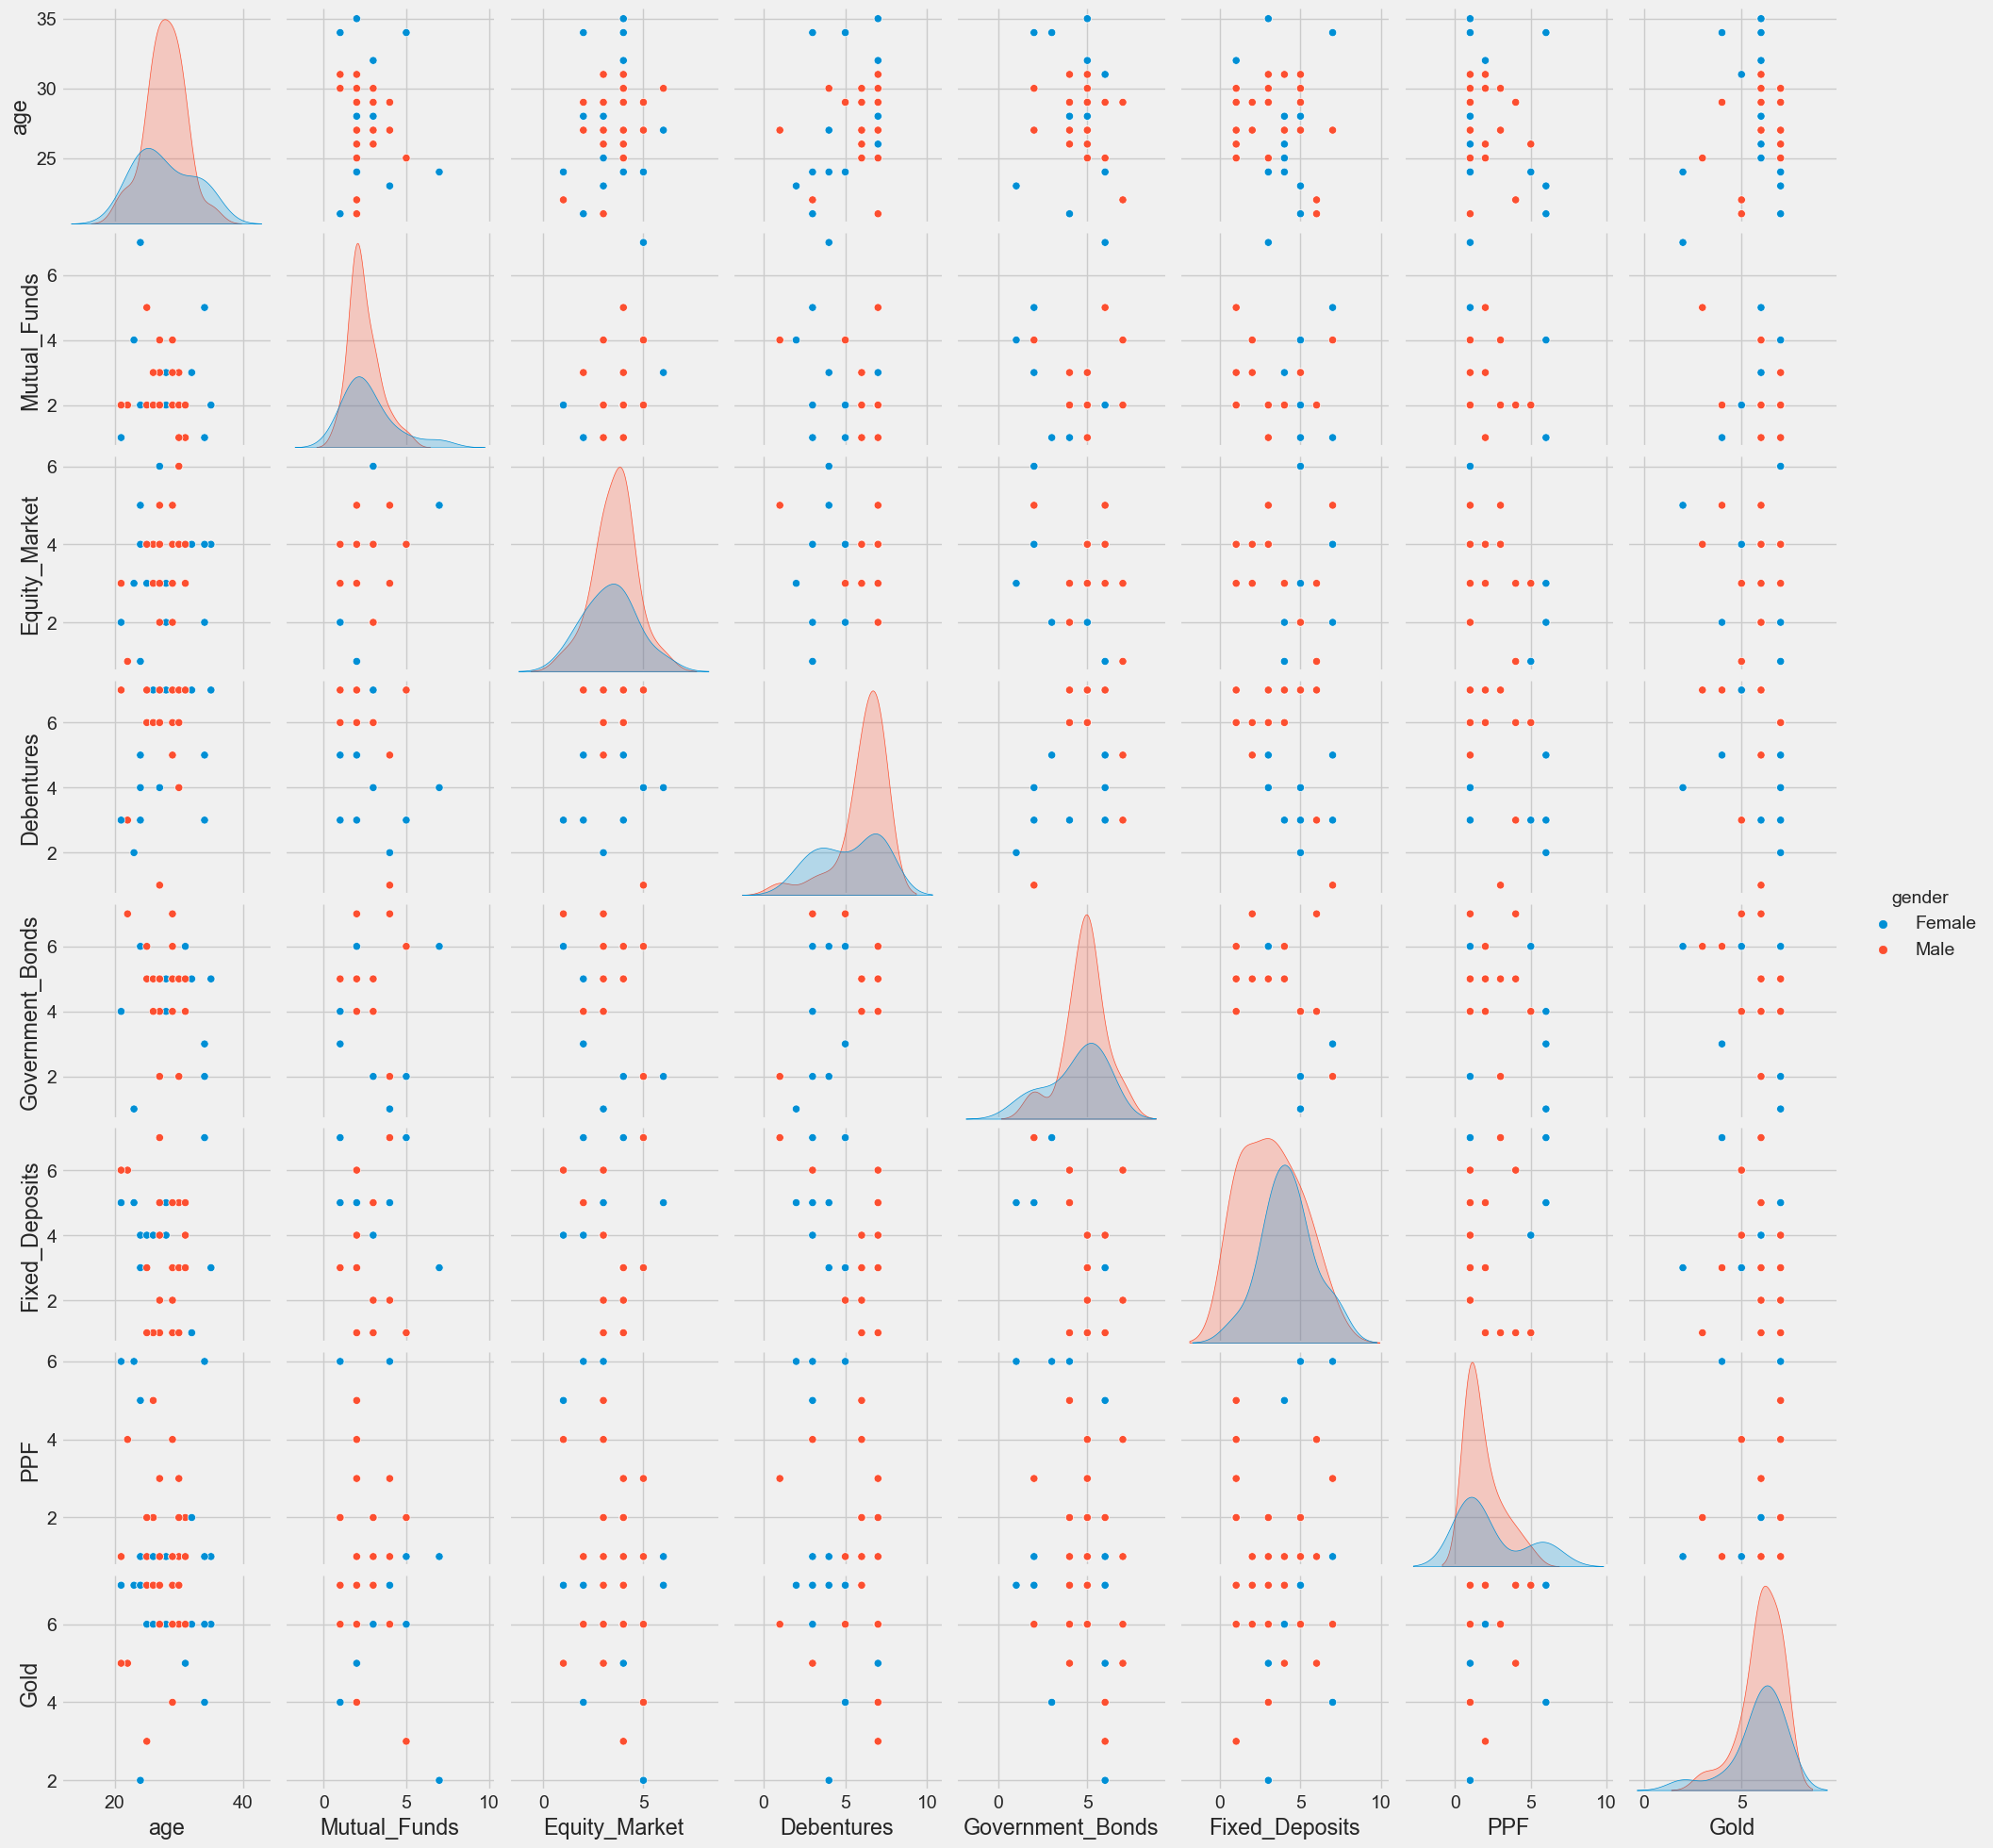

In [361]:
sns.pairplot(finance,hue='gender')

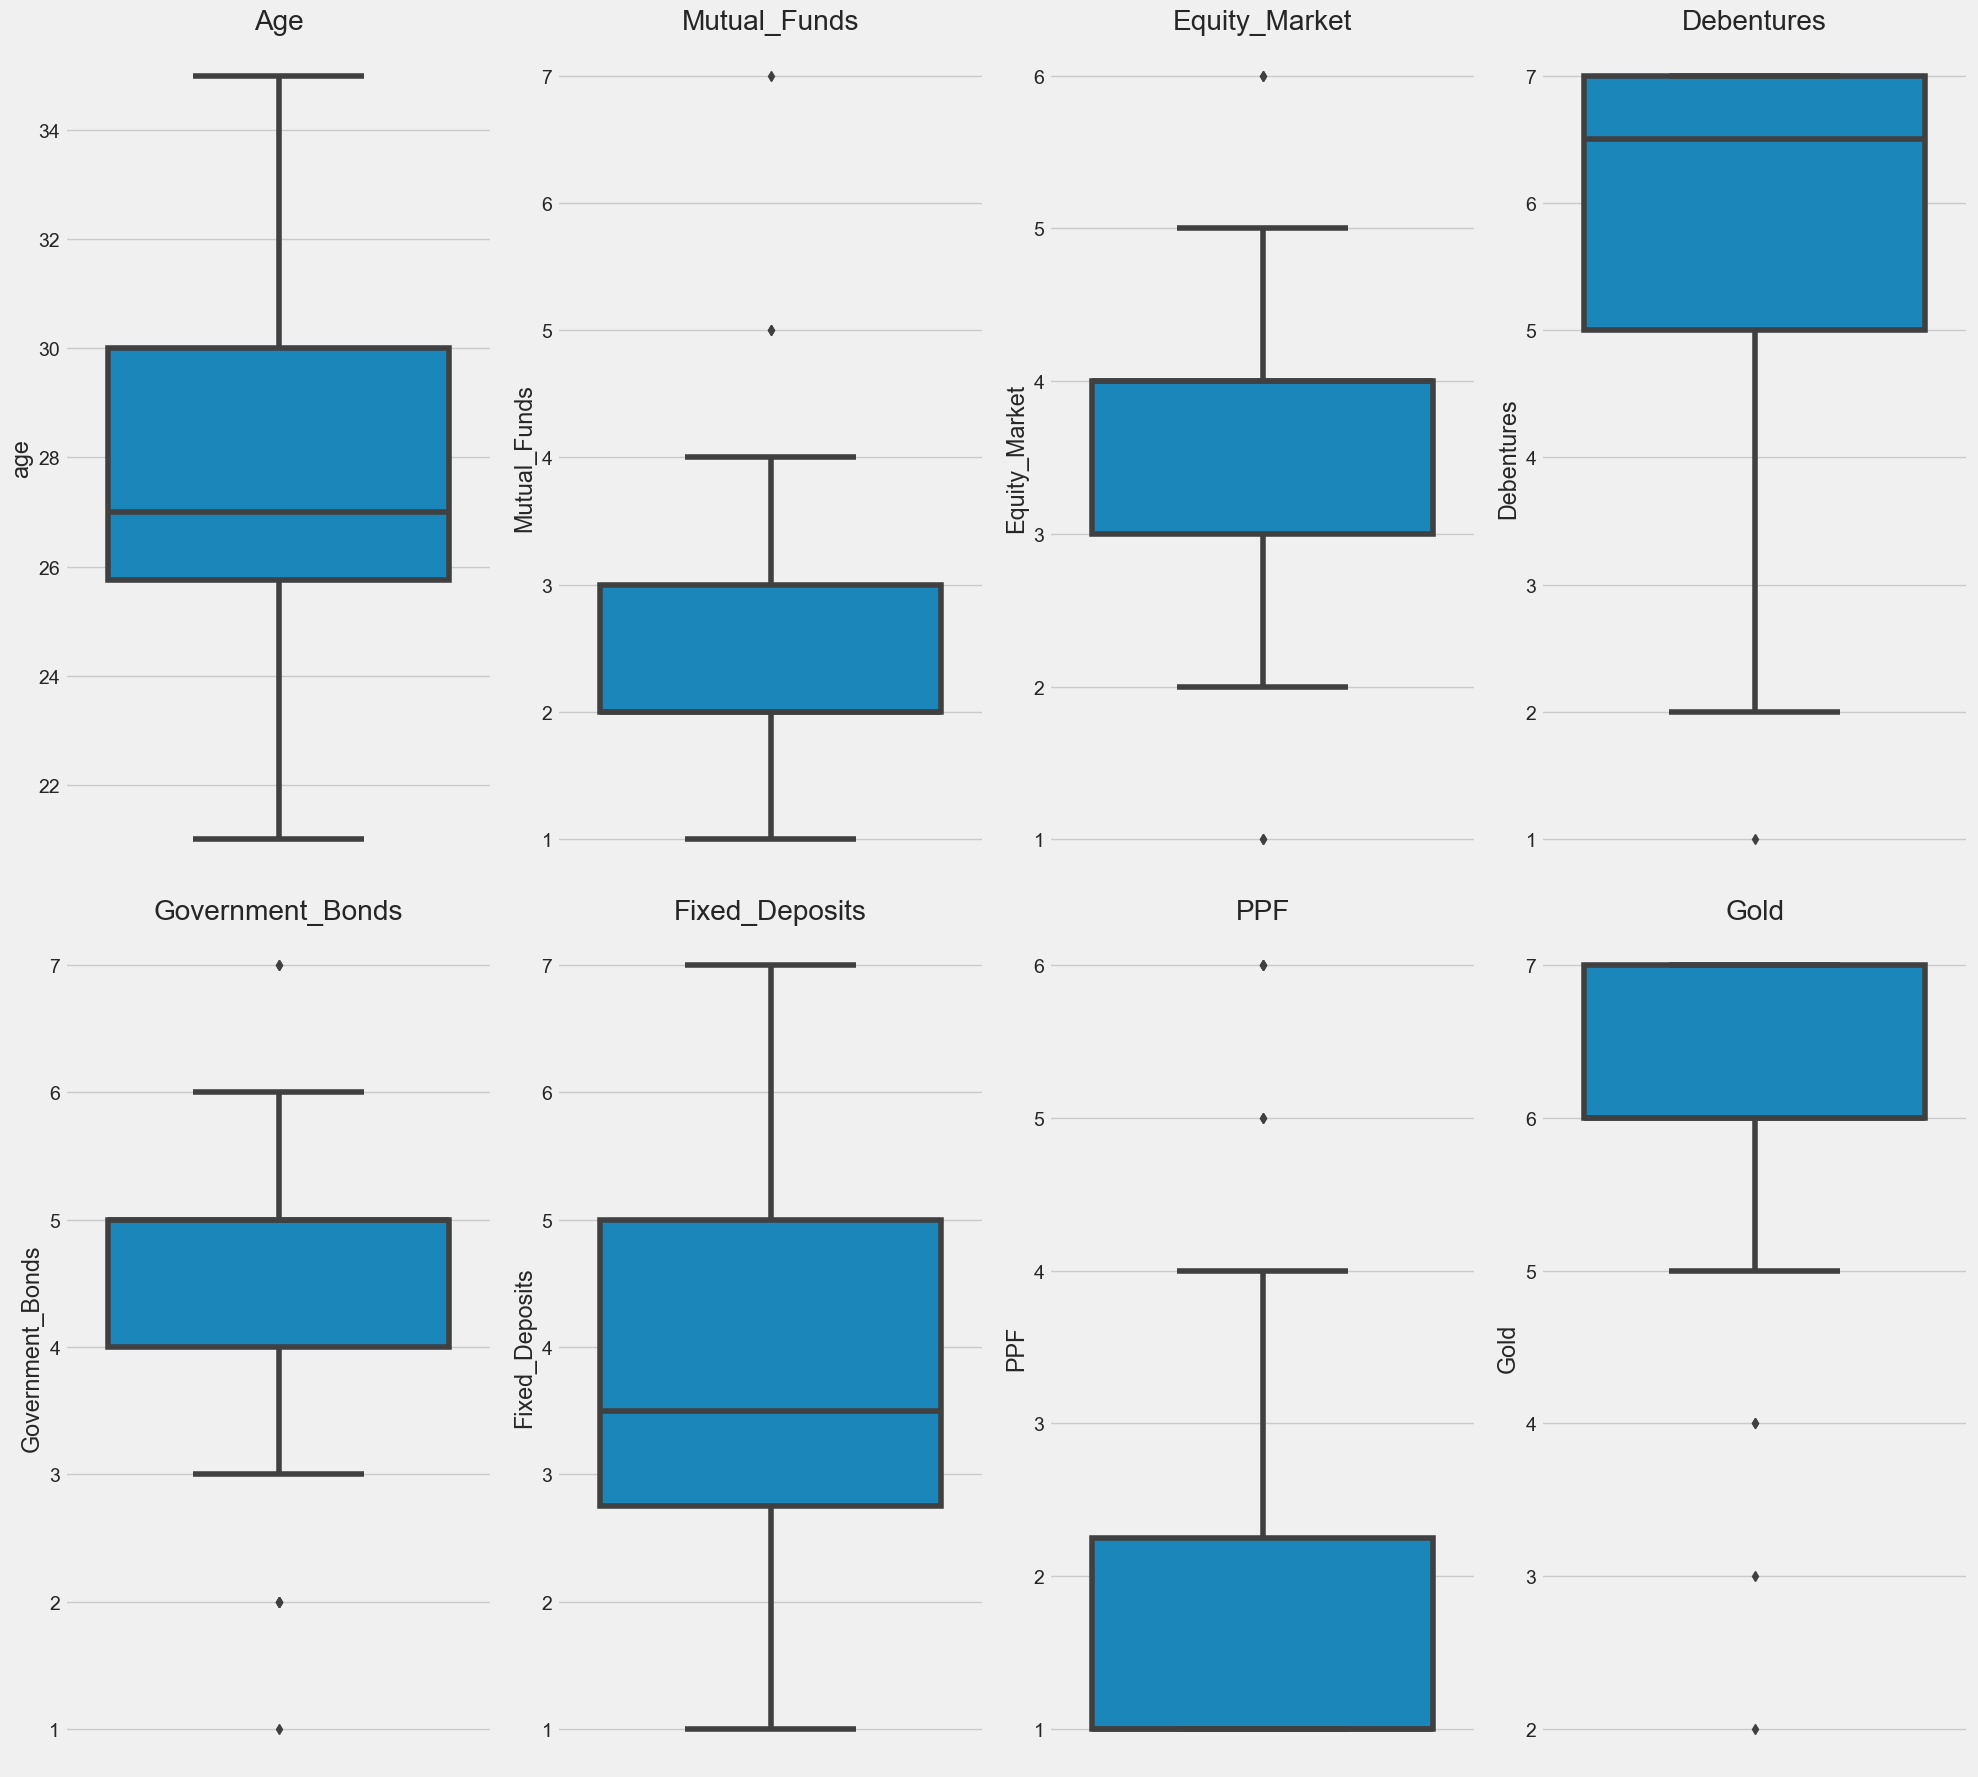

In [362]:
fig, axes = plt.subplots(2,4, figsize = (20,18))

#Create 8 boxplots
# 1st plot
sns.boxplot(data = finance,
            y = finance['age'],
            ax = axes[0,0])
axes[0,0].set_title('Age')

# 2nd plot
sns.boxplot(data = finance,
            y = finance['Mutual_Funds'],
            ax = axes[0,1])
axes[0,1].set_title('Mutual_Funds')

# 3rd plot
sns.boxplot(data = finance,
            y = finance['Equity_Market'],
            ax = axes[0,2])
axes[0,2].set_title('Equity_Market')

# 4th plot
sns.boxplot(data = finance,
            y = finance['Debentures'],
            ax = axes[0,3])
axes[0,3].set_title('Debentures')

# 5th plot
sns.boxplot(data = finance,
            y = finance['Government_Bonds'],
            ax = axes[1,0])
axes[1,0].set_title('Government_Bonds')

# 6th plot
sns.boxplot(data = finance,
            y = finance['Fixed_Deposits'],
            ax = axes[1,1])
axes[1,1].set_title('Fixed_Deposits')

# 7th plot
sns.boxplot(data = finance,
            y = finance['PPF'],
            ax = axes[1,2])
axes[1,2].set_title('PPF')

# 8th plot
sns.boxplot(data = finance,
            y = finance['Gold'],
            ax = axes[1,3])
axes[1,3].set_title('Gold')

#plt.ylim()

#Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

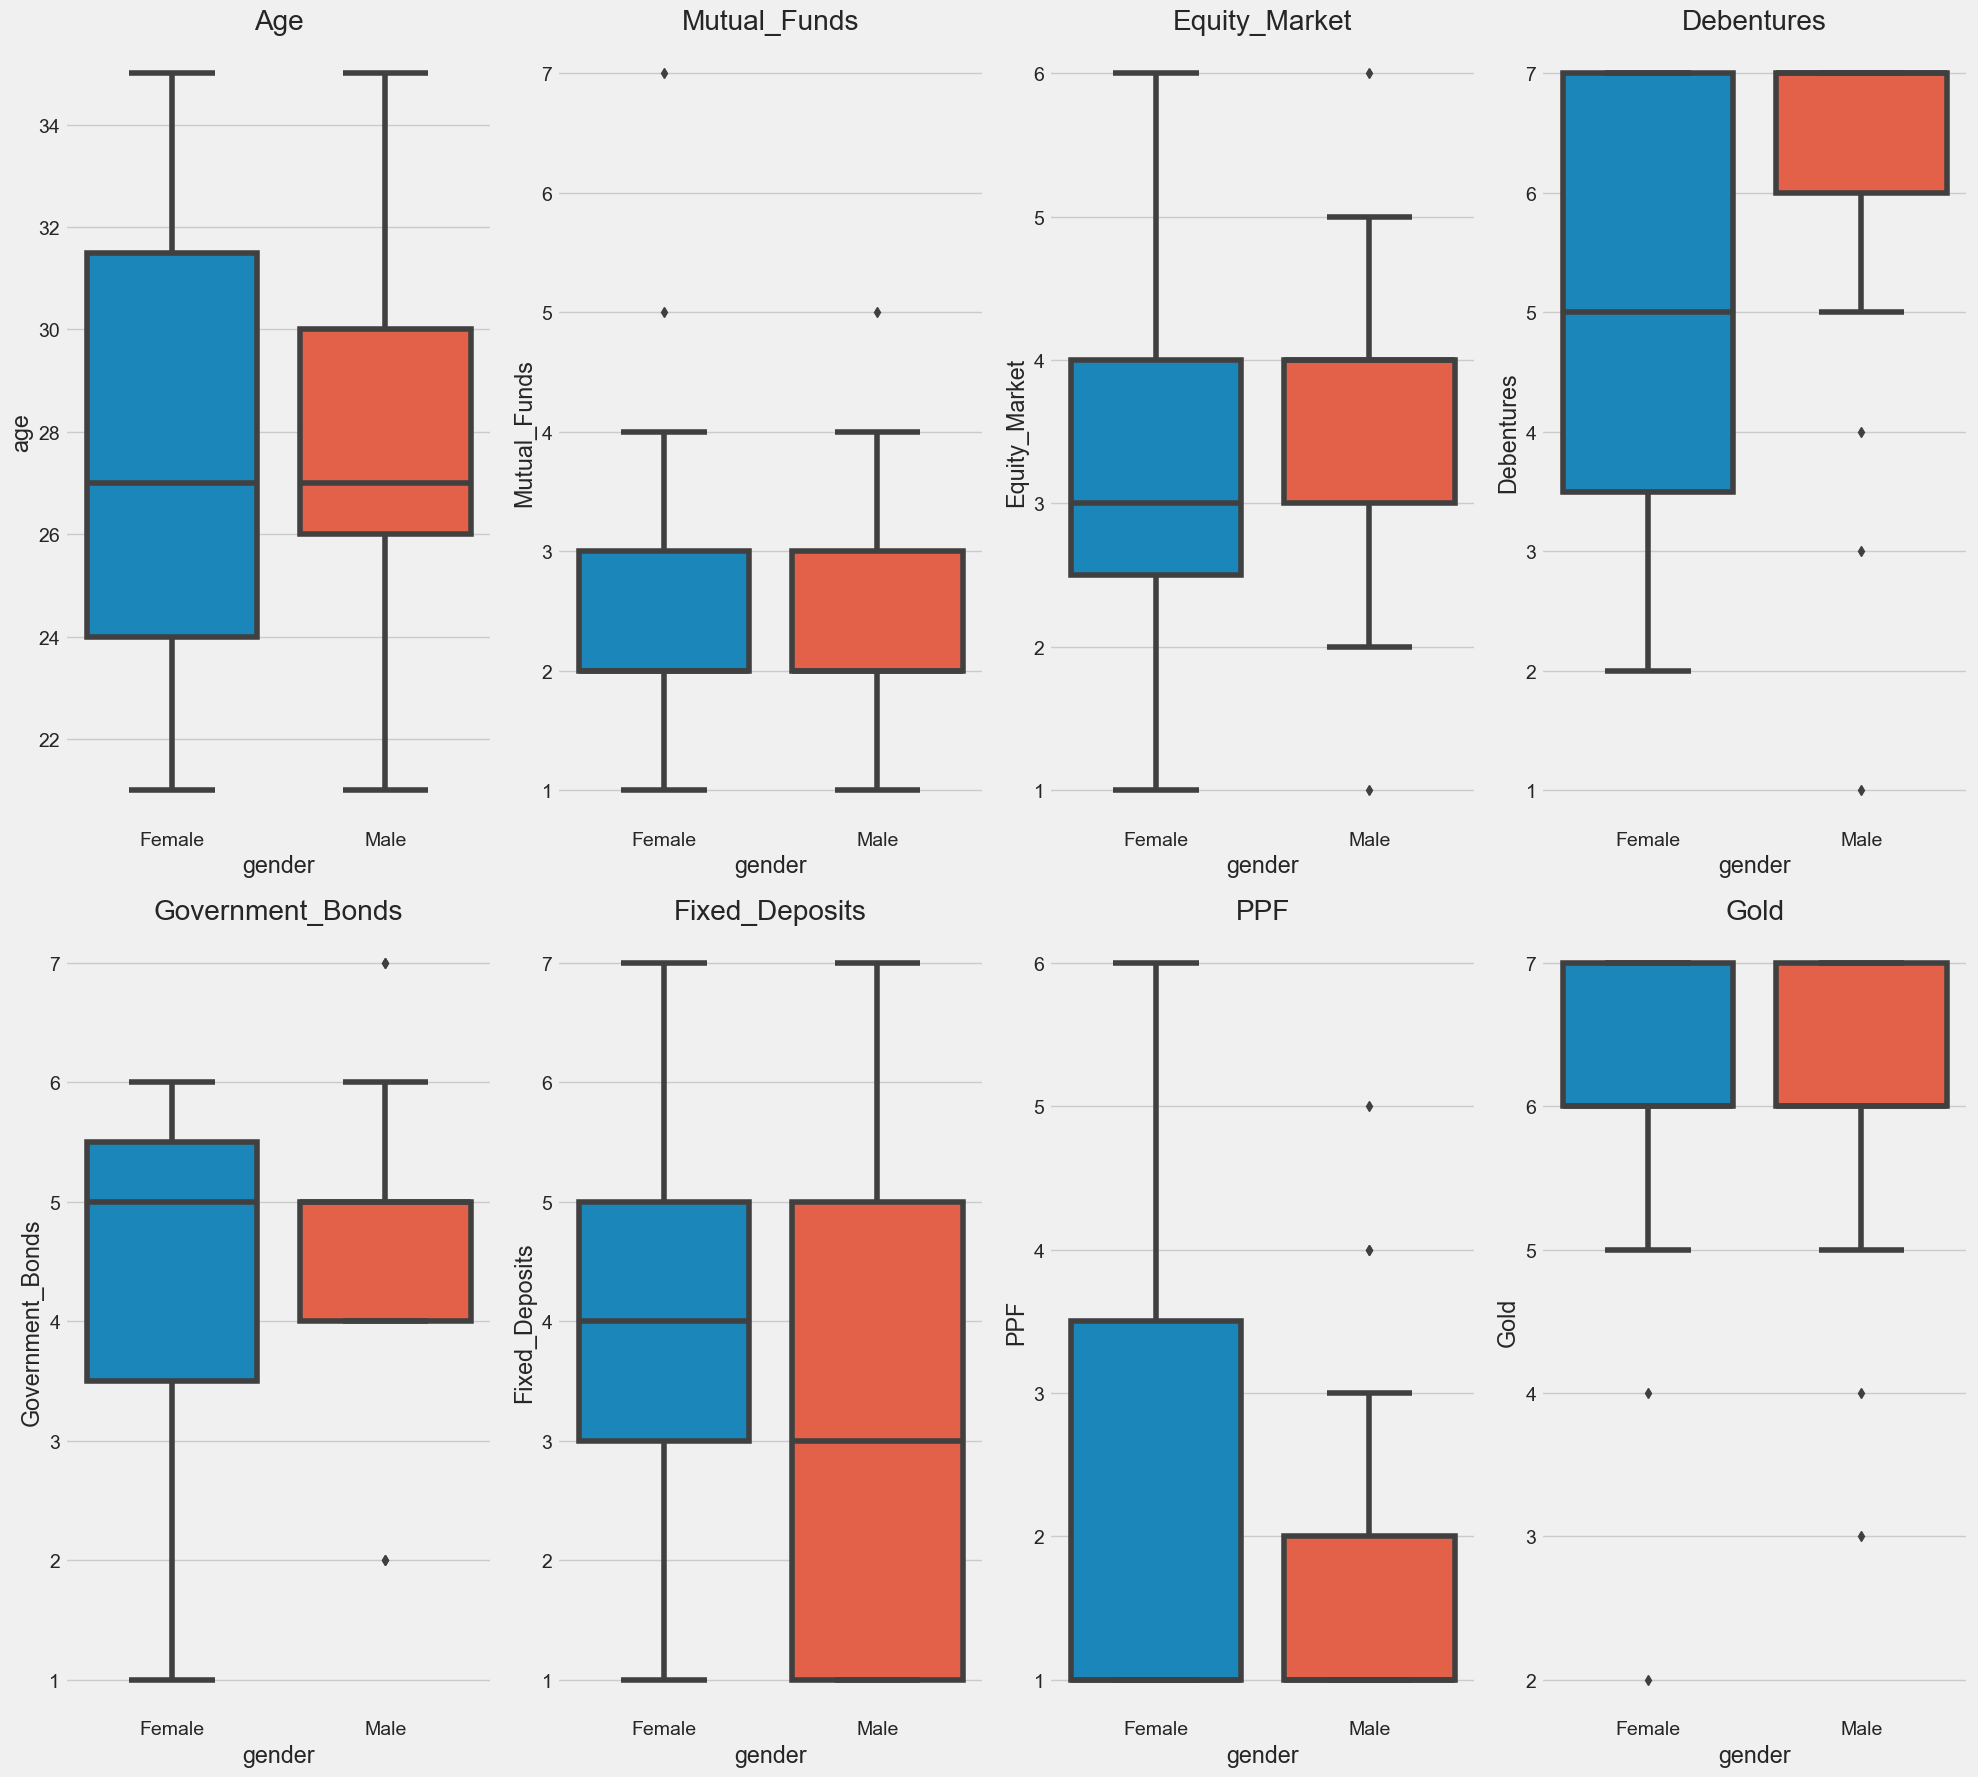

In [363]:
fig, axes = plt.subplots(2,4, figsize = (20,18))

#Create 8 boxplots
# 1st plot
sns.boxplot(data = finance,
            y = finance['age'],
            x = finance['gender'],
            ax = axes[0,0])
axes[0,0].set_title('Age')

# 2nd plot
sns.boxplot(data = finance,
            y = finance['Mutual_Funds'],
            x = finance['gender'],
            ax = axes[0,1])
axes[0,1].set_title('Mutual_Funds')

# 3rd plot
sns.boxplot(data = finance,
            y = finance['Equity_Market'],
            x = finance['gender'],
            ax = axes[0,2])
axes[0,2].set_title('Equity_Market')

# 4th plot
sns.boxplot(data = finance,
            y = finance['Debentures'],
            x = finance['gender'],
            ax = axes[0,3])
axes[0,3].set_title('Debentures')

# 5th plot
sns.boxplot(data = finance,
            y = finance['Government_Bonds'],
            x = finance['gender'],
            ax = axes[1,0])
axes[1,0].set_title('Government_Bonds')

# 6th plot
sns.boxplot(data = finance,
            y = finance['Fixed_Deposits'],
            x = finance['gender'],
            ax = axes[1,1])
axes[1,1].set_title('Fixed_Deposits')

# 7th plot
sns.boxplot(data = finance,
            y = finance['PPF'],
            x = finance['gender'],
            ax = axes[1,2])
axes[1,2].set_title('PPF')

# 8th plot
sns.boxplot(data = finance,
            y = finance['Gold'],
            x = finance['gender'],
            ax = axes[1,3])
axes[1,3].set_title('Gold')

#plt.ylim()

#Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

- There are a couple of outliers that might signifigantly impact the mean and the standard deviation.
- Let's check the distribution of each numerical value to evaluate the fate of those outliers 

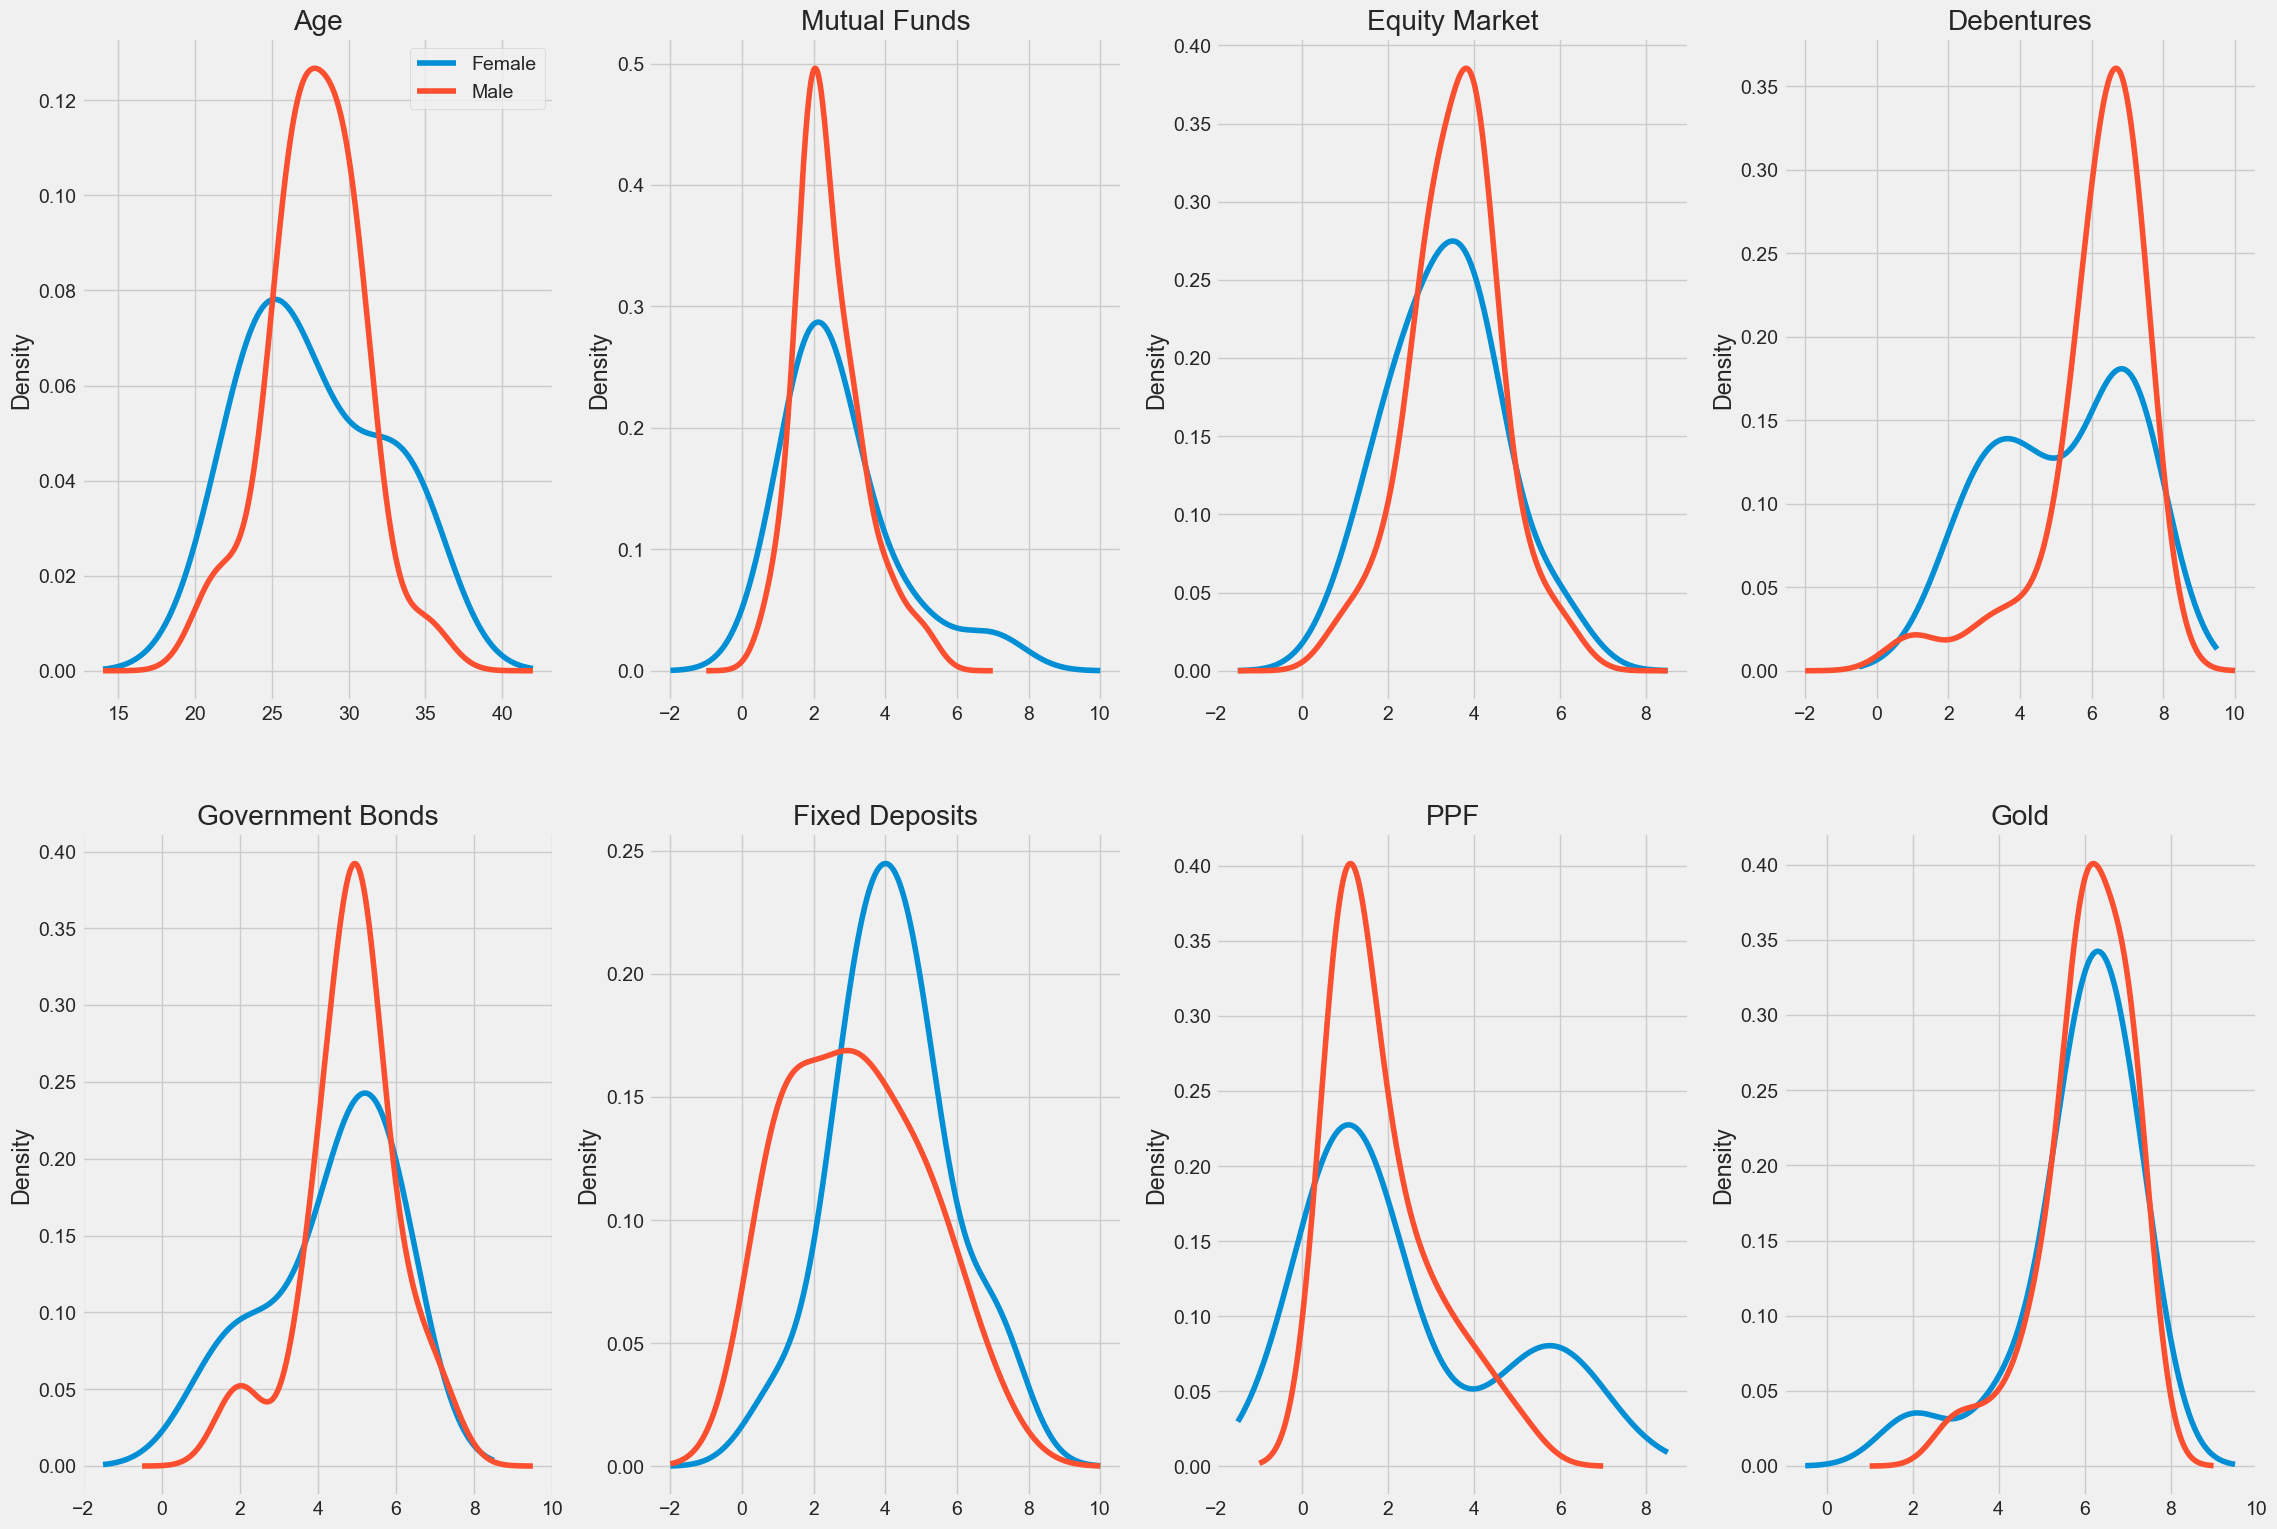

In [364]:
fig, axes = plt.subplots(2,4, figsize = (25,18))

#Show frequency age range by gender 
# 1st plot
fig1 = finance.groupby('gender').age.plot(kind='kde', 
                                          ax=axes[0,0])
axes[0,0].set_title('Age')


# 2nd plot
fig1 = finance.groupby('gender').Mutual_Funds.plot(kind='kde', 
                                          ax=axes[0,1])
axes[0,1].set_title('Mutual Funds')


# 3rd plot
fig1 = finance.groupby('gender').Equity_Market.plot(kind='kde', 
                                          ax=axes[0,2])
axes[0,2].set_title('Equity Market')


# 4th plot
fig1 = finance.groupby('gender').Debentures.plot(kind='kde', 
                                          ax=axes[0,3])
axes[0,3].set_title('Debentures')



# 5th plot
fig1 = finance.groupby('gender').Government_Bonds.plot(kind='kde', 
                                          ax=axes[1,0])
axes[1,0].set_title('Government Bonds')


# 6th plot
fig1 = finance.groupby('gender').Fixed_Deposits.plot(kind='kde', 
                                          ax=axes[1,1])
axes[1,1].set_title('Fixed Deposits')


# 7th plot
fig1 = finance.groupby('gender').PPF.plot(kind='kde', 
                                          ax=axes[1,2])
axes[1,2].set_title('PPF')


# 8th plot
fig1 = finance.groupby('gender').Gold.plot(kind='kde', 
                                          ax=axes[1,3])
axes[1,3].set_title('Gold')
axes[0,0].legend()





plt.show()

- Based on the numerical values distributions it seems that outliers skew the distributions

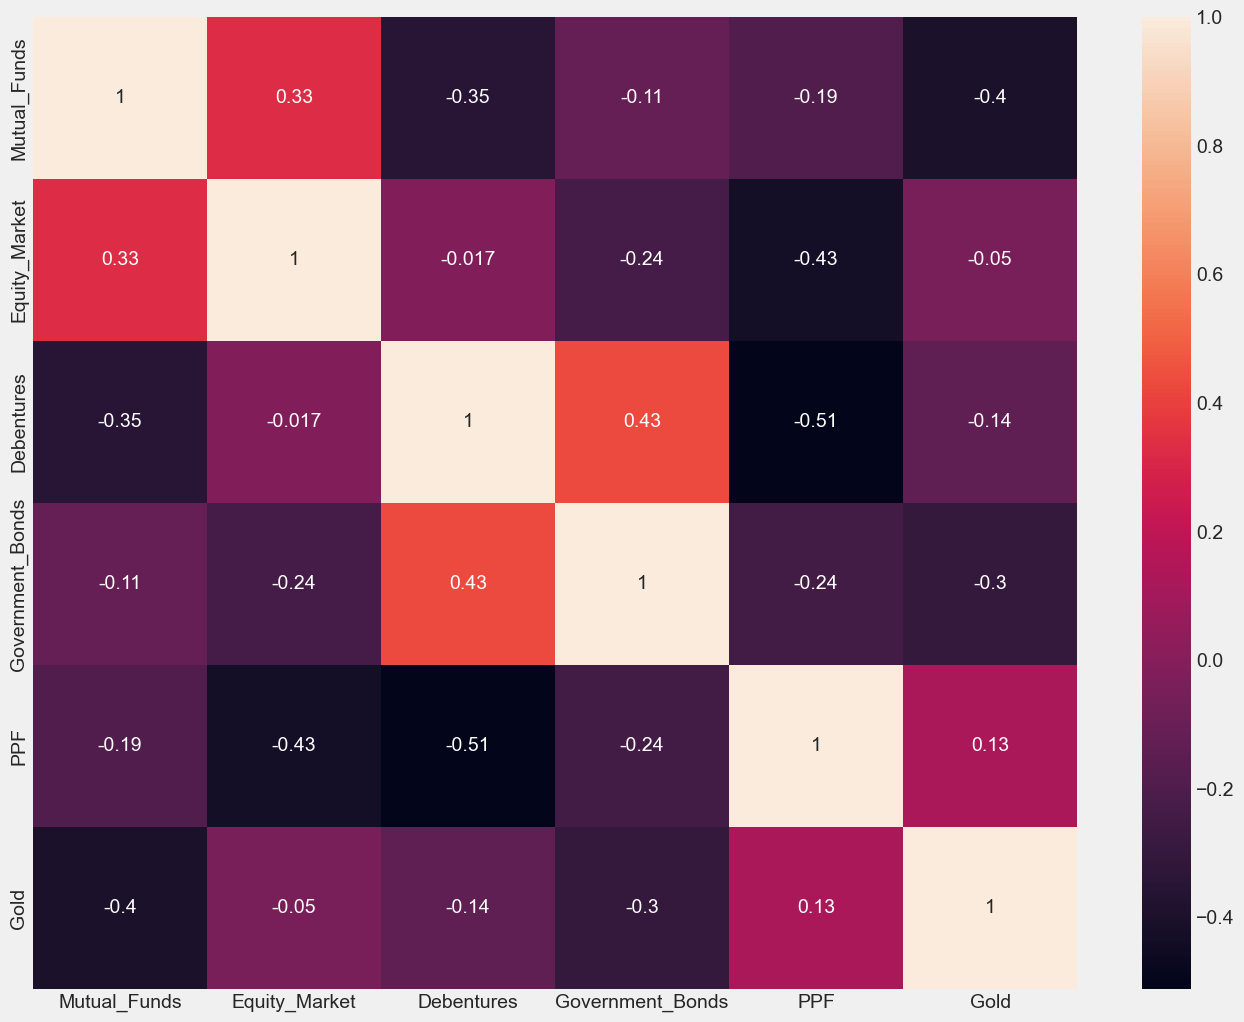

In [365]:
plt.figure(figsize=(15,12))
sns.heatmap(finance[['Mutual_Funds',
                     'Equity_Market',
                     'Debentures',
                     'Government_Bonds',
                     'PPF',
                     'Gold']].corr(), annot=True)
plt.show()

- We can drop the outliers. However due to the low number of inserted data, it wuld be better to perform imputation 

In [366]:

from scipy.stats import zscore
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
# Define a function to replace outliers with NaN
def replace_outliers_with_nan(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column[column < lower_bound] = np.nan
    column[column > upper_bound] = np.nan
    return column

# Selecting the columns with missing values
columns_with_outliers_df = finance[['Mutual_Funds',
                         'Equity_Market',
                         'Debentures',
                         'Government_Bonds',
                         'PPF',
                         'Gold']]


columns_with_outliers= ['Mutual_Funds',
                         'Equity_Market',
                         'Debentures',
                         'Government_Bonds',
                         'PPF',
                         'Gold']
# Apply the outlier replacement function to each numerical column
for col in columns_with_outliers_df.columns:
    columns_with_outliers_df[col] = replace_outliers_with_nan(columns_with_outliers_df[col])

# Creating an instance of IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fitting and transforming the imputer on df
imputed_values = imputer.fit_transform(finance[columns_with_outliers])

# Creating a new dataframe with imputed values
df_imputed = pd.DataFrame(imputed_values, columns=columns_with_outliers)

# Combining the imputed values with the rest of the original dataframe
imputed_finance = pd.concat([finance.drop(columns=columns_with_outliers), df_imputed], axis=1)



In [368]:
imputed_finance

,gender,age,Investment_Avenues,Fixed_Deposits,Stock_Marktet,Factor,Objective,Purpose,Duration,Invest_Monitor,Expect,Avenue,Savings_Objectives,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,PPF,Gold
0,Female,34,Yes,7,Yes,Returns,Capital Appreciation,Wealth Creation,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines,1.0,2.0,5.0,3.0,6.0,4.0
1,Female,23,Yes,5,No,Locking Period,Capital Appreciation,Wealth Creation,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants,4.0,3.0,2.0,1.0,6.0,7.0
2,Male,30,Yes,5,Yes,Returns,Capital Appreciation,Wealth Creation,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television,3.0,6.0,4.0,2.0,1.0,7.0
3,Male,22,Yes,6,Yes,Returns,Income,Wealth Creation,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet,2.0,1.0,3.0,7.0,4.0,5.0
4,Female,24,No,4,No,Returns,Income,Wealth Creation,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet,2.0,1.0,3.0,6.0,5.0,7.0
5,Female,24,No,3,No,Risk,Capital Appreciation,Wealth Creation,1-3 years,Daily,30%-40%,Mutual Fund,Retirement Plan,Liquidity,Fund Diversification,Safe Investment,Risk Free,Internet,7.0,5.0,4.0,6.0,1.0,2.0
6,Female,27,Yes,5,Yes,Returns,Capital Appreciation,Wealth Creation,3-5 years,Monthly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,High Interest Rates,Financial Consultants,3.0,6.0,4.0,2.0,1.0,7.0
7,Male,21,Yes,6,Yes,Risk,Capital Appreciation,Wealth Creation,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Newspapers and Magazines,2.0,3.0,7.0,4.0,1.0,5.0
8,Male,35,Yes,3,Yes,Returns,Growth,Savings for Future,1-3 years,Weekly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Fund Diversification,Safe Investment,Fixed Returns,Television,2.0,4.0,7.0,5.0,1.0,6.0
9,Male,31,Yes,5,Yes,Returns,Capital Appreciation,Wealth Creation,3-5 years,Monthly,30%-40%,Fixed Deposits,Retirement Plan,Capital Appreciation,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines,1.0,3.0,7.0,4.0,2.0,6.0


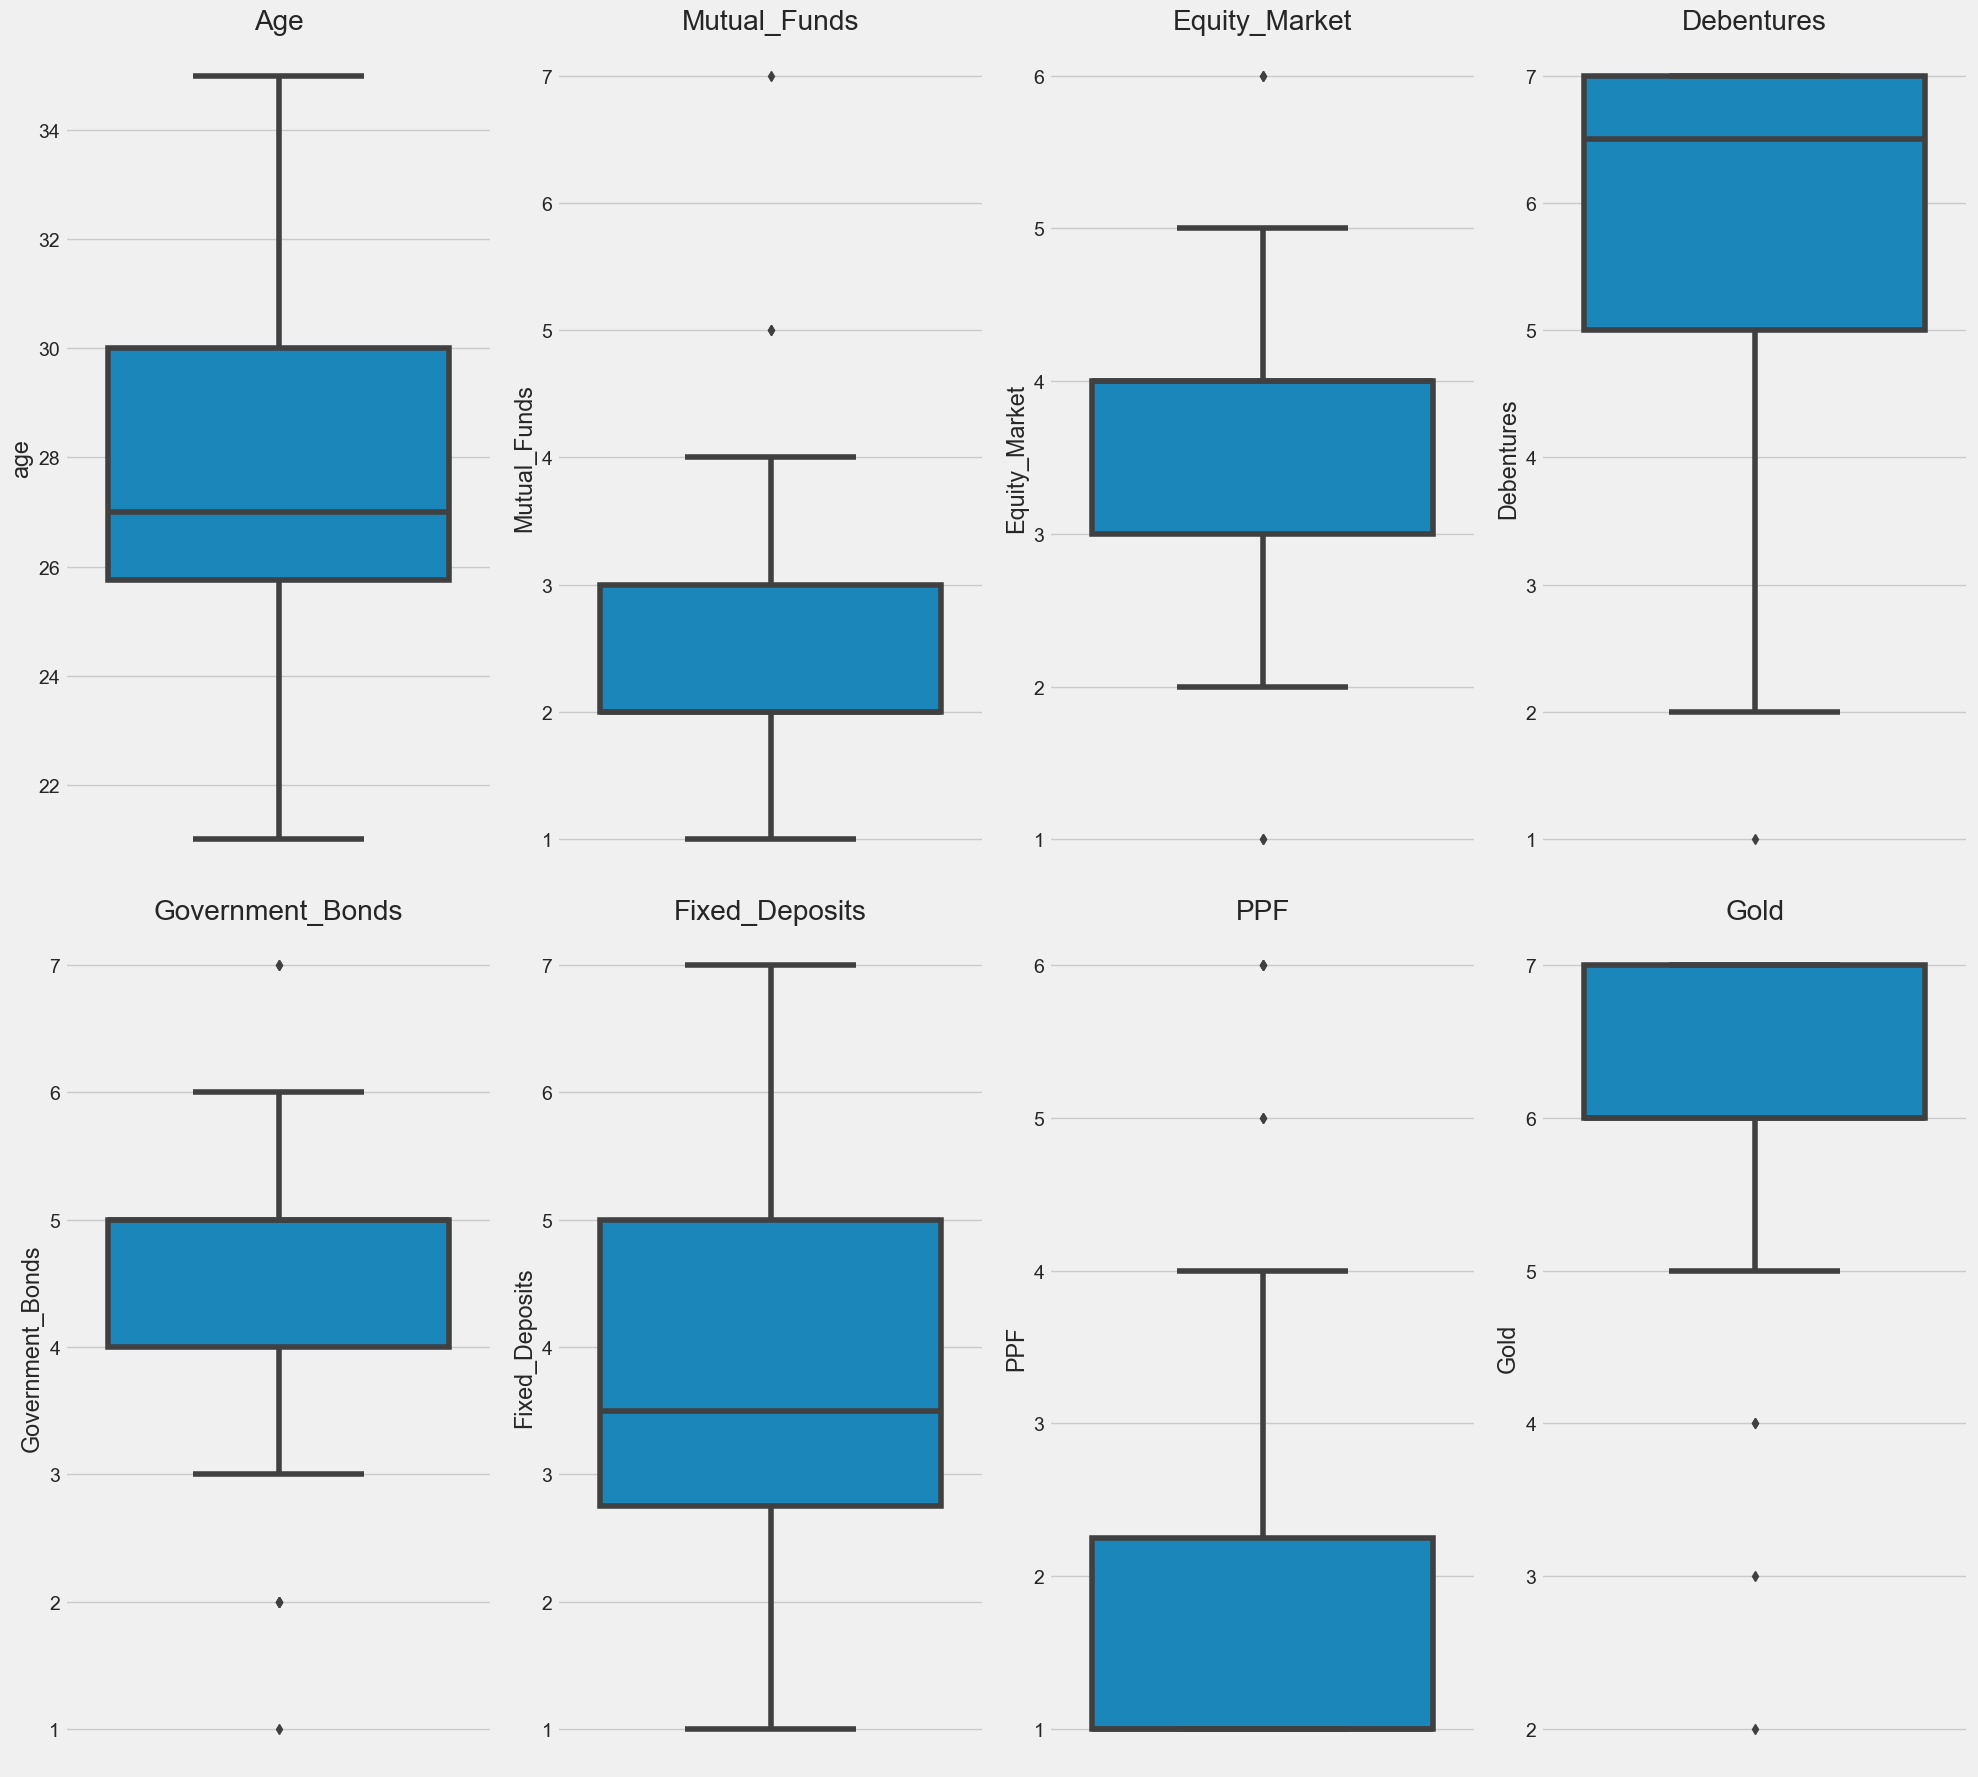

In [369]:
fig, axes = plt.subplots(2,4, figsize = (20,18))

#Create 8 boxplots
# 1st plot
sns.boxplot(data = imputed_finance,
            y = imputed_finance['age'],
            ax = axes[0,0])
axes[0,0].set_title('Age')

# 2nd plot
sns.boxplot(data = imputed_finance,
            y = imputed_finance['Mutual_Funds'],
            ax = axes[0,1])
axes[0,1].set_title('Mutual_Funds')

# 3rd plot
sns.boxplot(data = imputed_finance,
            y = imputed_finance['Equity_Market'],
            ax = axes[0,2])
axes[0,2].set_title('Equity_Market')

# 4th plot
sns.boxplot(data = imputed_finance,
            y = imputed_finance['Debentures'],
            ax = axes[0,3])
axes[0,3].set_title('Debentures')

# 5th plot
sns.boxplot(data = imputed_finance,
            y = imputed_finance['Government_Bonds'],
            ax = axes[1,0])
axes[1,0].set_title('Government_Bonds')

# 6th plot
sns.boxplot(data = imputed_finance,
            y = imputed_finance['Fixed_Deposits'],
            ax = axes[1,1])
axes[1,1].set_title('Fixed_Deposits')

# 7th plot
sns.boxplot(data = imputed_finance,
            y = imputed_finance['PPF'],
            ax = axes[1,2])
axes[1,2].set_title('PPF')

# 8th plot
sns.boxplot(data = imputed_finance,
            y = imputed_finance['Gold'],
            ax = axes[1,3])
axes[1,3].set_title('Gold')

#plt.ylim()

#Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

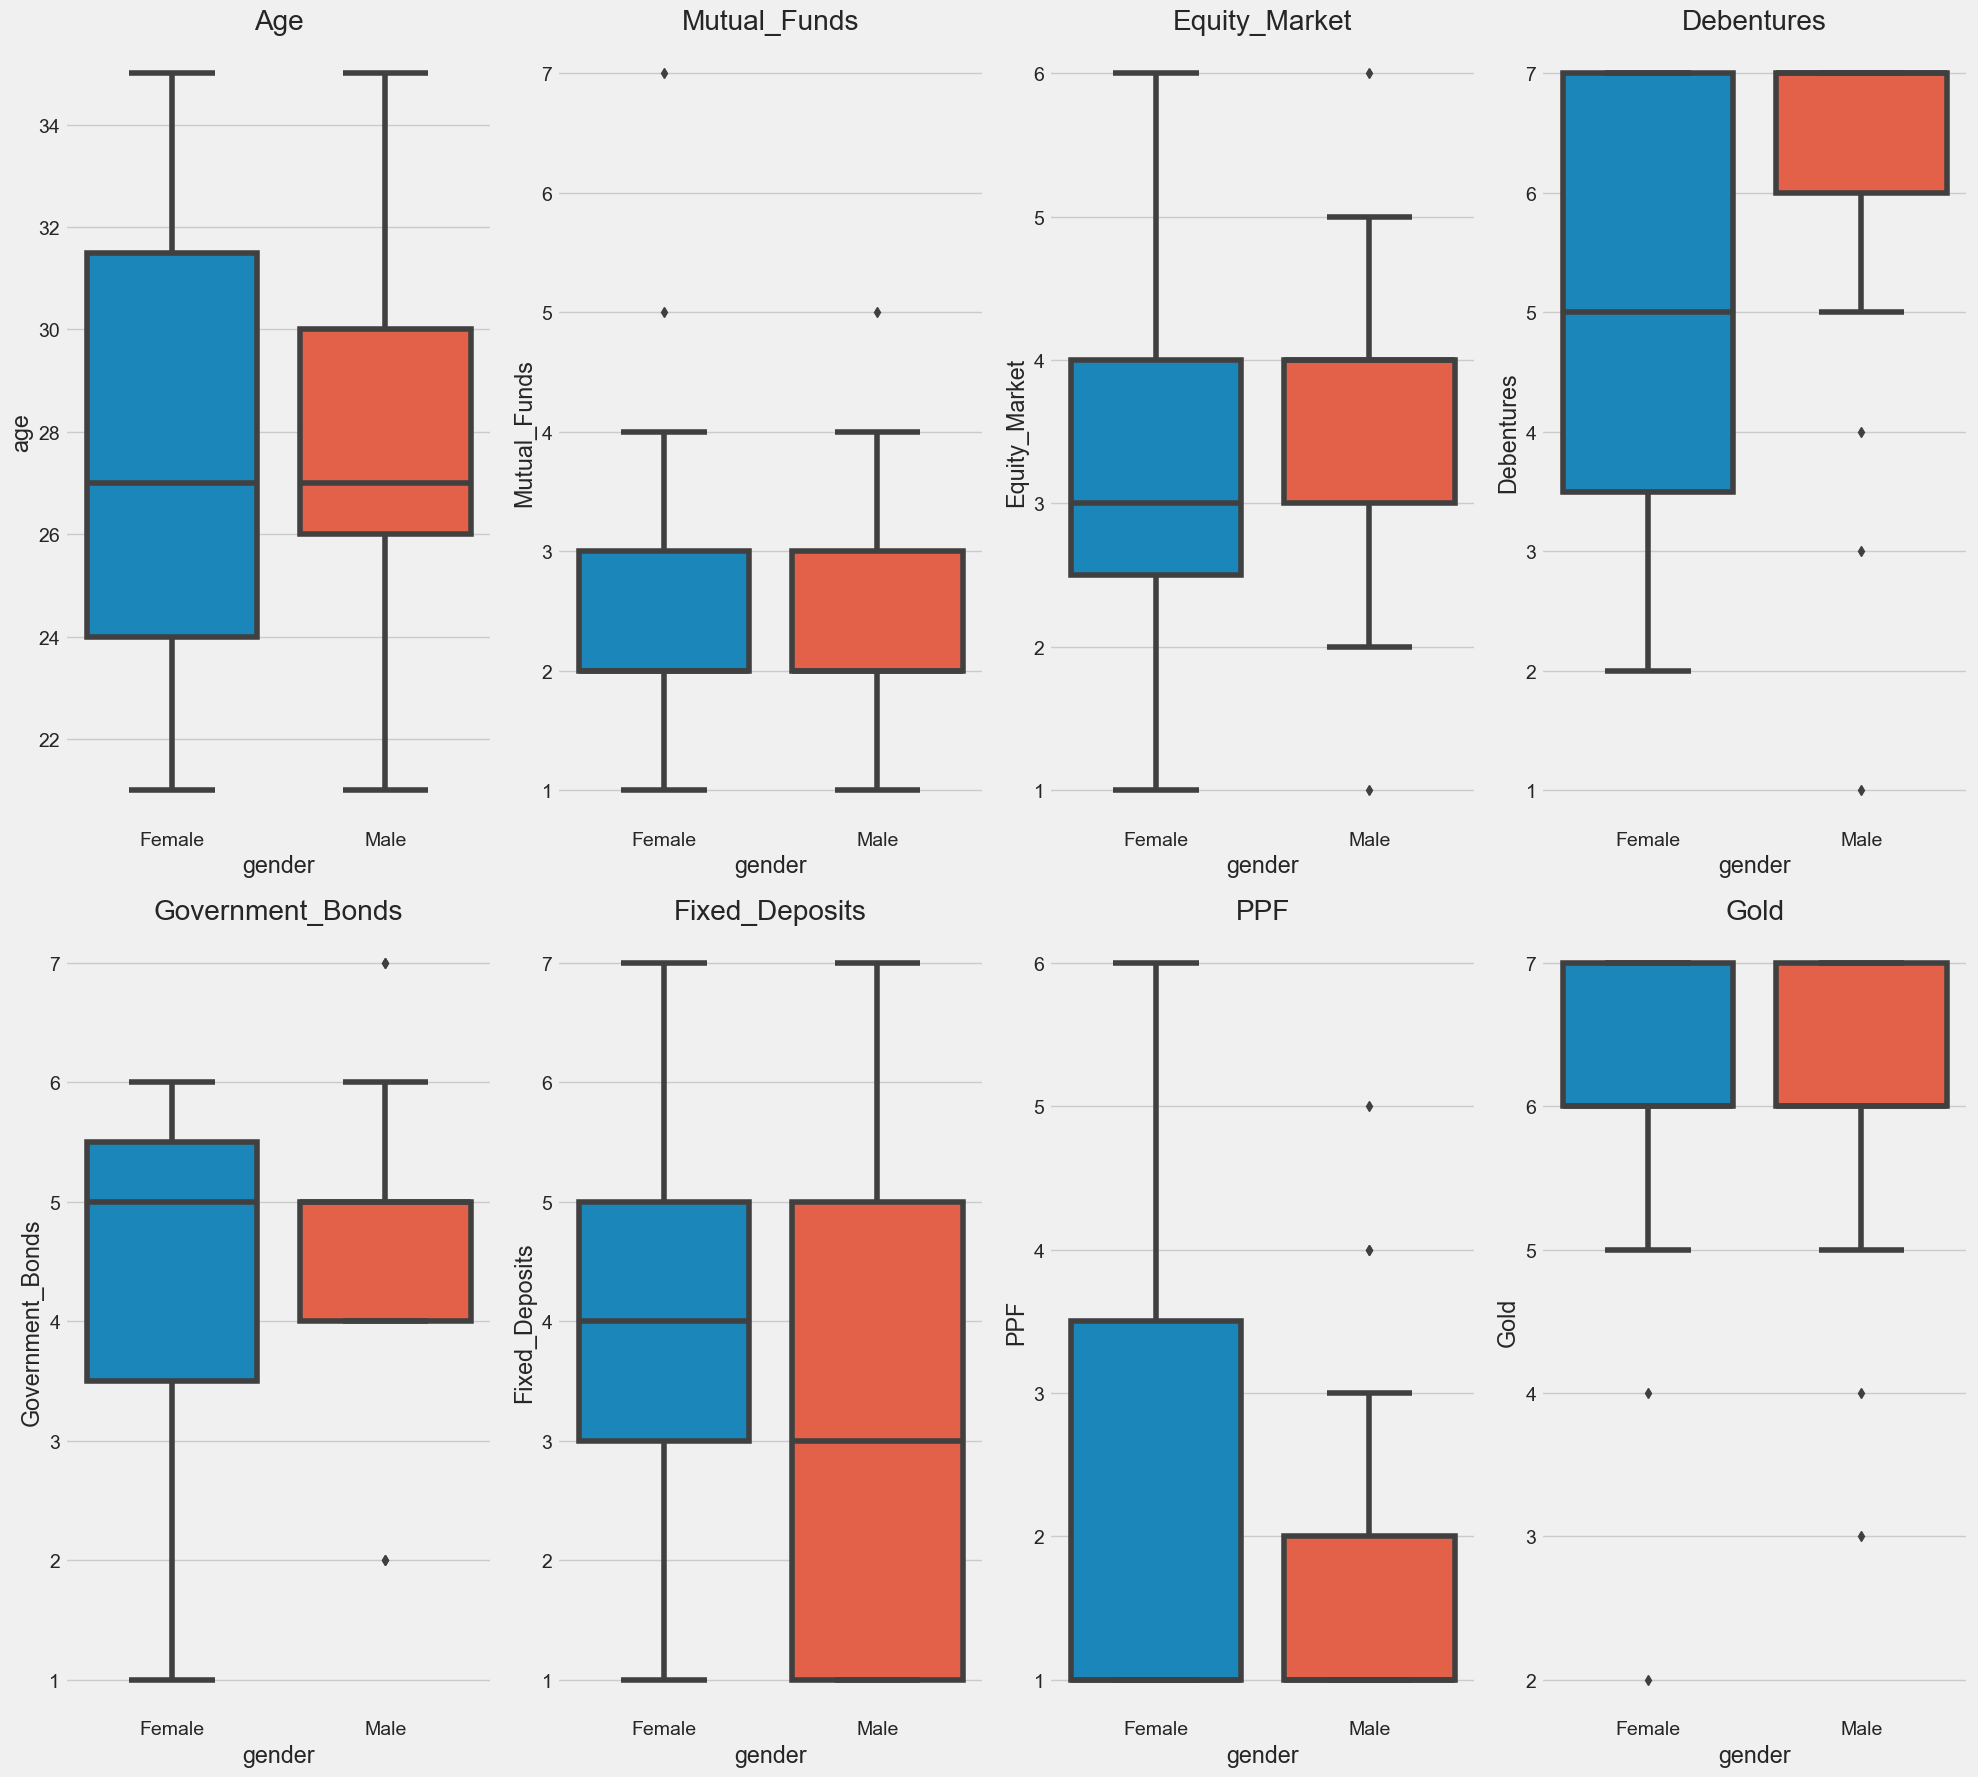

In [370]:
fig, axes = plt.subplots(2,4, figsize = (20,18))

#Create 8 boxplots
# 1st plot
sns.boxplot(data = imputed_finance,
            y = imputed_finance['age'],
            x = imputed_finance['gender'],
            ax = axes[0,0])
axes[0,0].set_title('Age')

# 2nd plot
sns.boxplot(data = imputed_finance,
            y = imputed_finance['Mutual_Funds'],
            x = imputed_finance['gender'],
            ax = axes[0,1])
axes[0,1].set_title('Mutual_Funds')

# 3rd plot
sns.boxplot(data = imputed_finance,
            y = imputed_finance['Equity_Market'],
            x = imputed_finance['gender'],
            ax = axes[0,2])
axes[0,2].set_title('Equity_Market')

# 4th plot
sns.boxplot(data = imputed_finance,
            y = imputed_finance['Debentures'],
            x = imputed_finance['gender'],
            ax = axes[0,3])
axes[0,3].set_title('Debentures')

# 5th plot
sns.boxplot(data = imputed_finance,
            y = imputed_finance['Government_Bonds'],
            x = imputed_finance['gender'],
            ax = axes[1,0])
axes[1,0].set_title('Government_Bonds')

# 6th plot
sns.boxplot(data = imputed_finance,
            y = imputed_finance['Fixed_Deposits'],
            x = imputed_finance['gender'],
            ax = axes[1,1])
axes[1,1].set_title('Fixed_Deposits')

# 7th plot
sns.boxplot(data = imputed_finance,
            y = imputed_finance['PPF'],
            x = imputed_finance['gender'],
            ax = axes[1,2])
axes[1,2].set_title('PPF')

# 8th plot
sns.boxplot(data = imputed_finance,
            y = imputed_finance['Gold'],
            x = imputed_finance['gender'],
            ax = axes[1,3])
axes[1,3].set_title('Gold')

#plt.ylim()

#Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

- There are not significant differences between male and females for most numeric features except PPF (Pension Protection Funds) that is increased in male, while Debentures are significantly descreased in male compared to females.

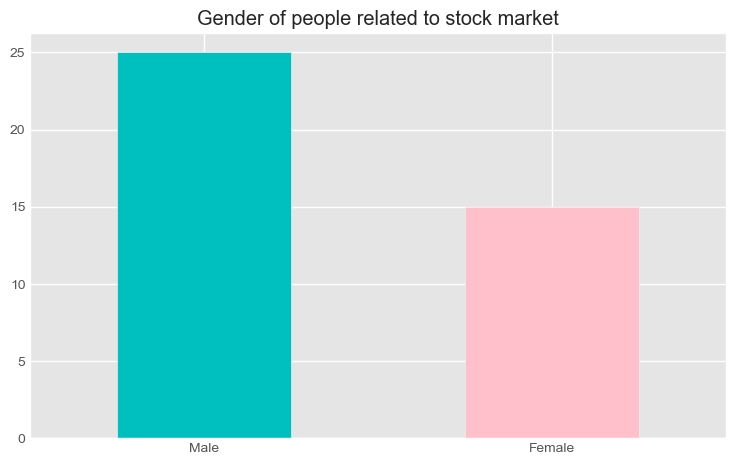

In [386]:
#Count of people who related to stock market and investment by gender
plt.style.use('ggplot')
colors = ['c', 'pink']
fig = imputed_finance['gender'].value_counts().plot(kind='bar', 
                                              figsize=(8,5),
                                              color = colors)
fig.set_title('Gender of people related to stock market')
plt.tick_params(axis='x', rotation=0)  
plt.show()

- Generally,  there are 10% less female than male people within the stock marker

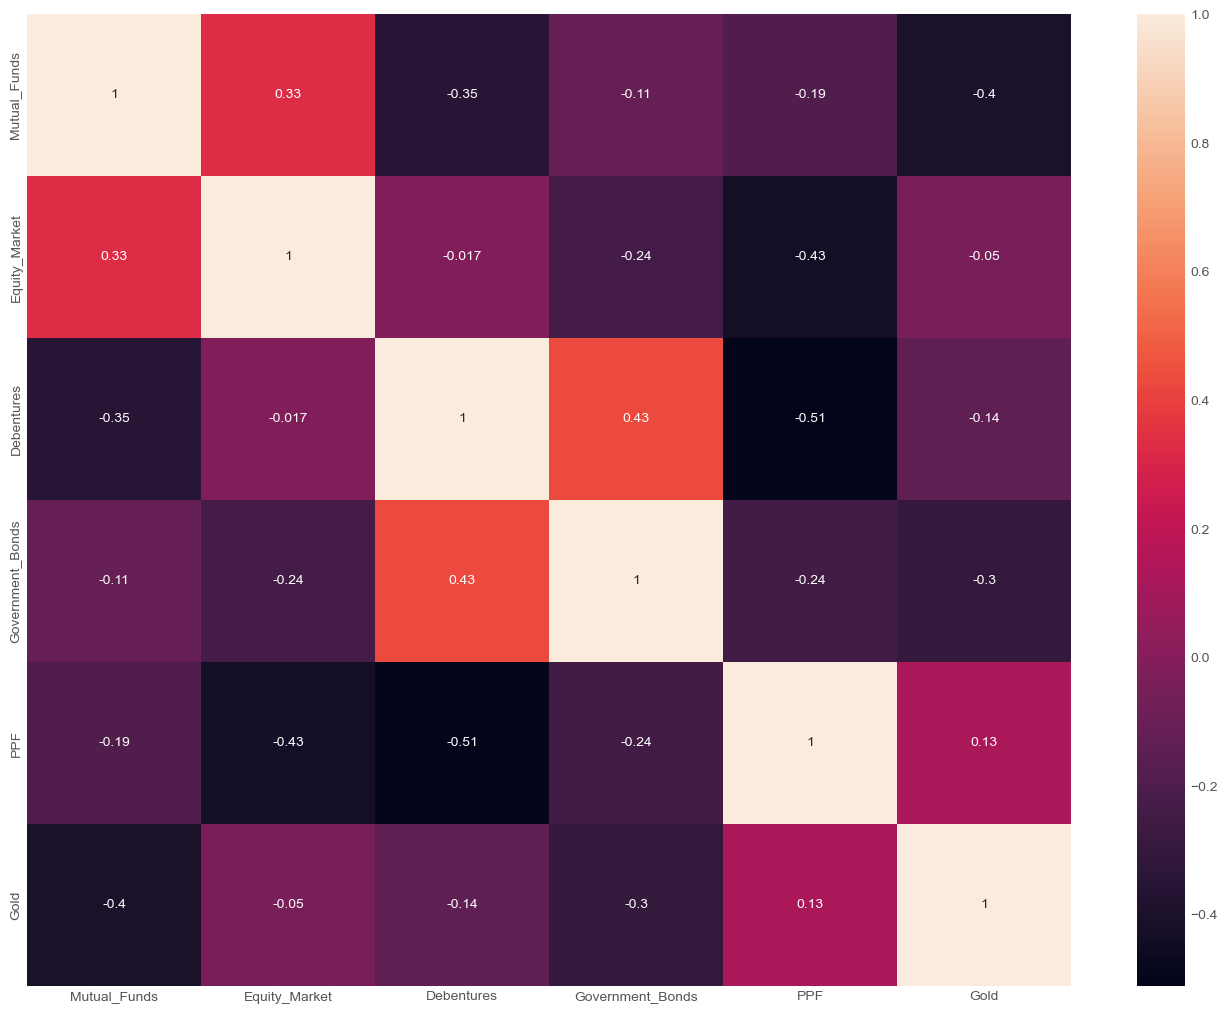

In [372]:
plt.figure(figsize=(15,12))
sns.heatmap(imputed_finance[['Mutual_Funds',
                     'Equity_Market',
                     'Debentures',
                     'Government_Bonds',
                     'PPF',
                     'Gold']].corr(), annot=True)
plt.show()

- Equity market and mutual funds are correlated (0.433) same as Debentures and Government Bonds (0.43)

## Questions: 
- What are the most preferred investment avenues among your data points?
- Are there any gender-based or age-based differences in investment preferences?
- What returns or expectations do investors have from their investments?
- Are these expectations linked to specific investment choices?
- Why do individuals invest in Equity, Mutual Funds, Bonds, or Fixed Deposits?
- Are the reasons for investment consistent across different demographic groups?
- What are the common savings objectives expressed in your dataset?
- Are there specific investment avenues associated with particular savings objectives?
- Does the choice of monitoring method vary by age or gender?
- What is the typical duration of investments in your dataset?
- Are there differences in investment duration based on savings objectives?
- What is the average allocation of investments in Mutual Funds, Equity Market, Debentures, etc.?
- Do specific demographics prefer certain investment types over others?


### What are the most preferred investment avenues among your data points?

In [373]:
from matplotlib import colormaps
list(colormaps)


['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

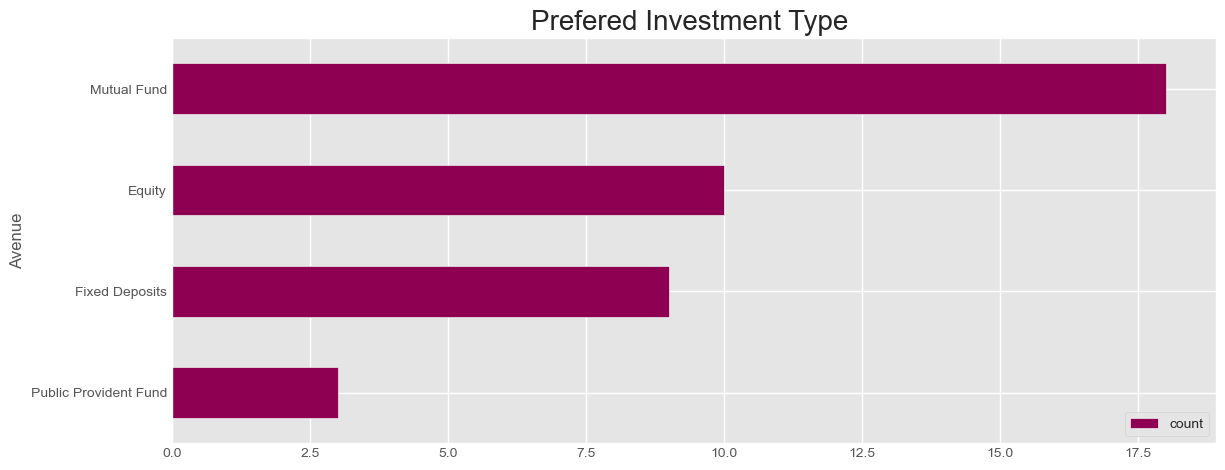

In [374]:
fig2 = imputed_finance.groupby('Avenue')['Avenue'] \
                .aggregate(['count']) \
                .sort_values('count') \
                .plot(kind='barh', 
                      figsize=(12,5), 
                      colormap = 'PiYG'
                      )                 
plt.title('Prefered Investment Type ',fontsize = 20)
plt.show()

-  The prefered investment points are 'mutual funds'.
-  The least prefered in investment is 'Public Provident Fund'

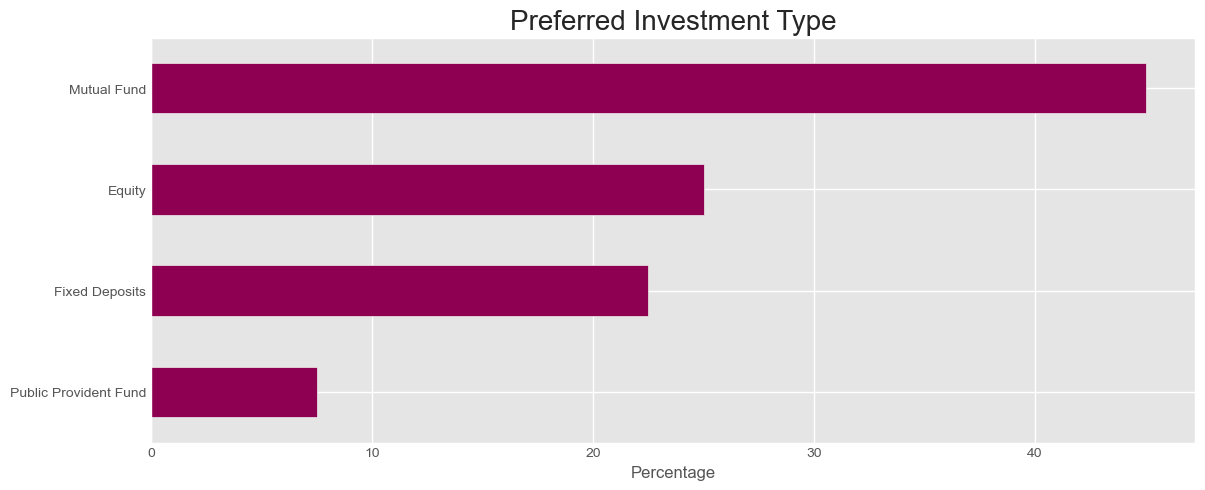

In [375]:
# Group by 'Avenue' and calculate the percentage of each 'Avenue'
percentage_df = imputed_finance['Avenue'] \
                .value_counts()\
                .sort_values(ascending=True)
                
percentage_df = (percentage_df / 40)*100

# Sort the values by the count of the 'Avenue' (investment type)
#percentage_df = percentage_df.sort_values(ascending=True)

# Plot the percentages as a horizontal bar chart
percentage_df.plot(kind='barh', 
                   figsize=(12, 5), 
                   colormap='PiYG')
plt.title('Preferred Investment Type', fontsize=20)
plt.xlabel('Percentage')
plt.show()

- Similarly we can illustrate this difference in percentages with Mutual Fund investment type having almost double preference compared to Equity and Fixed Desposits


### Are there any gender-based or age-based differences in investment preferences?

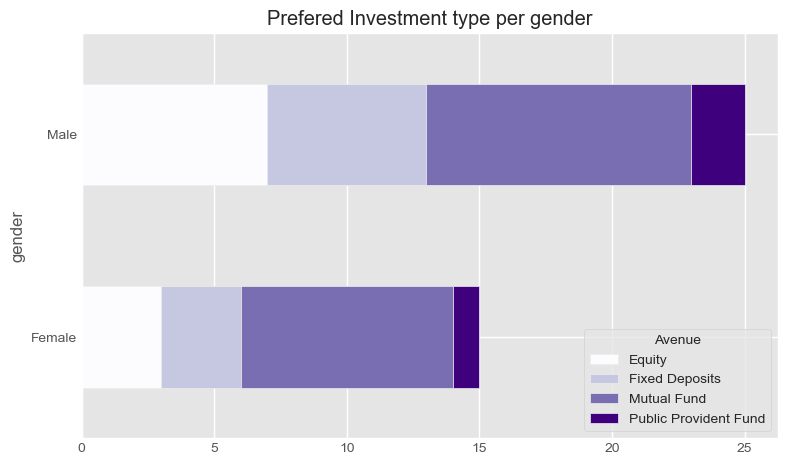

In [411]:

fig2 = imputed_finance.groupby(['gender','Avenue'])['Avenue'] \
                      .count().unstack()\
                      .plot(kind='barh', 
                            stacked=True, 
                            figsize=(8,5),
                            colormap='Purples')
fig2.set_title('Prefered Investment type per gender')
plt.show()

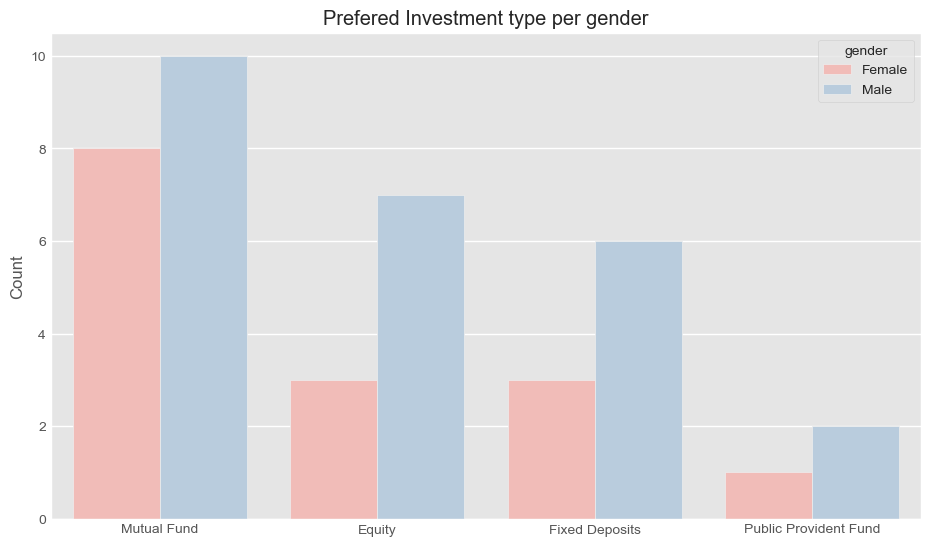

In [377]:
colors = ['pink', 'c']
plt.figure(figsize=(10, 6))
fig3 = sns.countplot(data=imputed_finance, 
                     x='Avenue', 
                     hue='gender',
                     palette = 'Pastel1')
plt.title('Prefered Investment type per gender')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='gender', loc='upper right')
plt.show()

- Both females and males follow the same trend in their investment preference, with the highest prefered invetment type the 'Mutual Fund' and the lowest 'Public Provident Funds'
- It is worth noting that both equity and fixed deposits investment types are chosen equally among women.

### What is the average allocation of investments in Mutual Funds, Equity Market, Debentures, etc.?

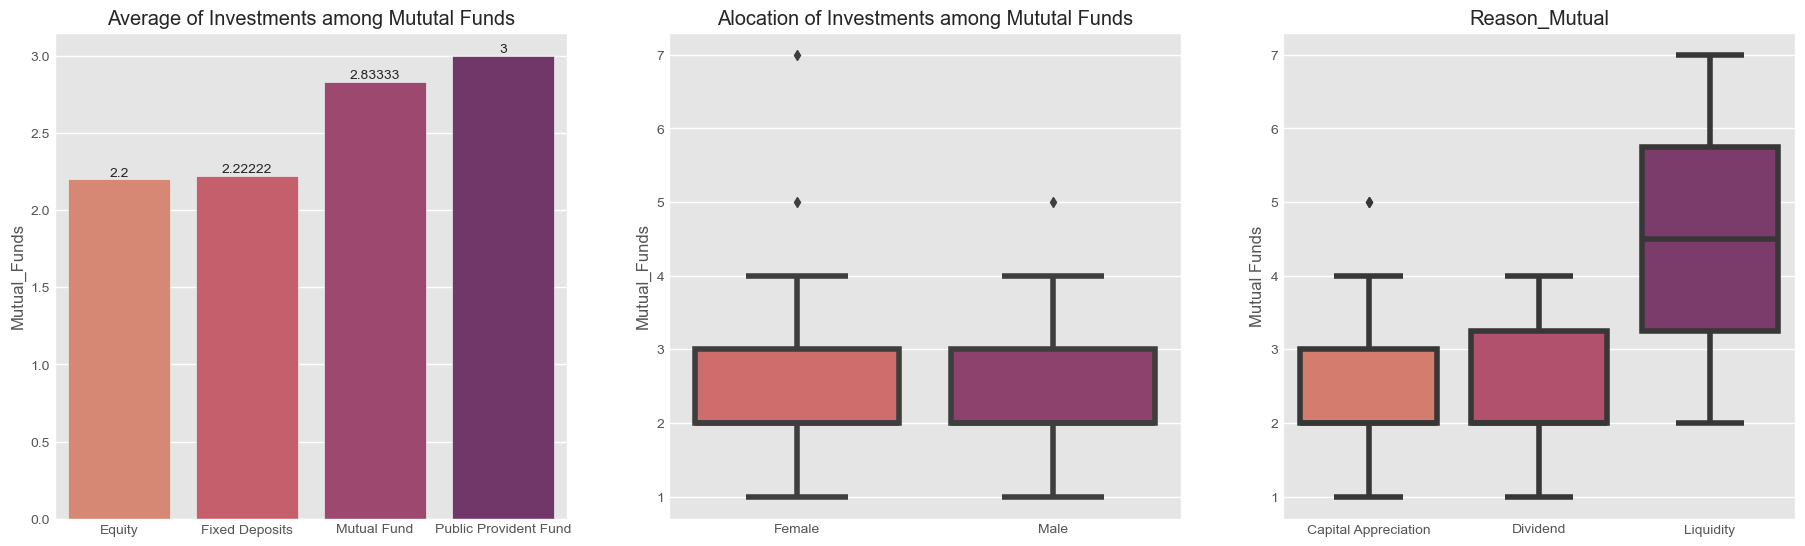

In [378]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 rows, 2 column


# Group by 'Avenue' and calculate the average of 'Mutual_Funds' for each group
average_allocation = imputed_finance.groupby('Avenue')['Mutual_Funds'].mean().reset_index()

fig4 = sns.barplot(data=average_allocation,
            y='Mutual_Funds', 
            x='Avenue',
            ax= axes[0],
            palette = "flare")

fig4.bar_label(fig4.containers[0], fontsize=10)
fig4 .set_title('Average of Investments among Mututal Funds')
fig4.set(xlabel ='')

fig3= sns.boxplot(data=imputed_finance,
            y='Mutual_Funds', 
            x='gender',
            ax= axes[1],
            palette= "flare")
fig3.set_title('Alocation of Investments among Mututal Funds')
fig3.set(xlabel ='')

fig5= sns.boxplot(data=imputed_finance,
            y='Mutual_Funds', 
            x='Reason_Equity',
            ax= axes[2],
            palette= "flare")
fig5.set_title('Reason_Mutual')
fig5.set(xlabel ='')

plt.ylabel('Mutual Funds')
plt.xticks(rotation=0)
plt.show()

-  Among Mututal Funds investments, public Provided Fund type of invetsment has a higher average following with Mutual Fund, Fixed Deposits and Equity
- Both females and males investoras are contributing to Mutual funds (are a group investment from multiple shareholders)

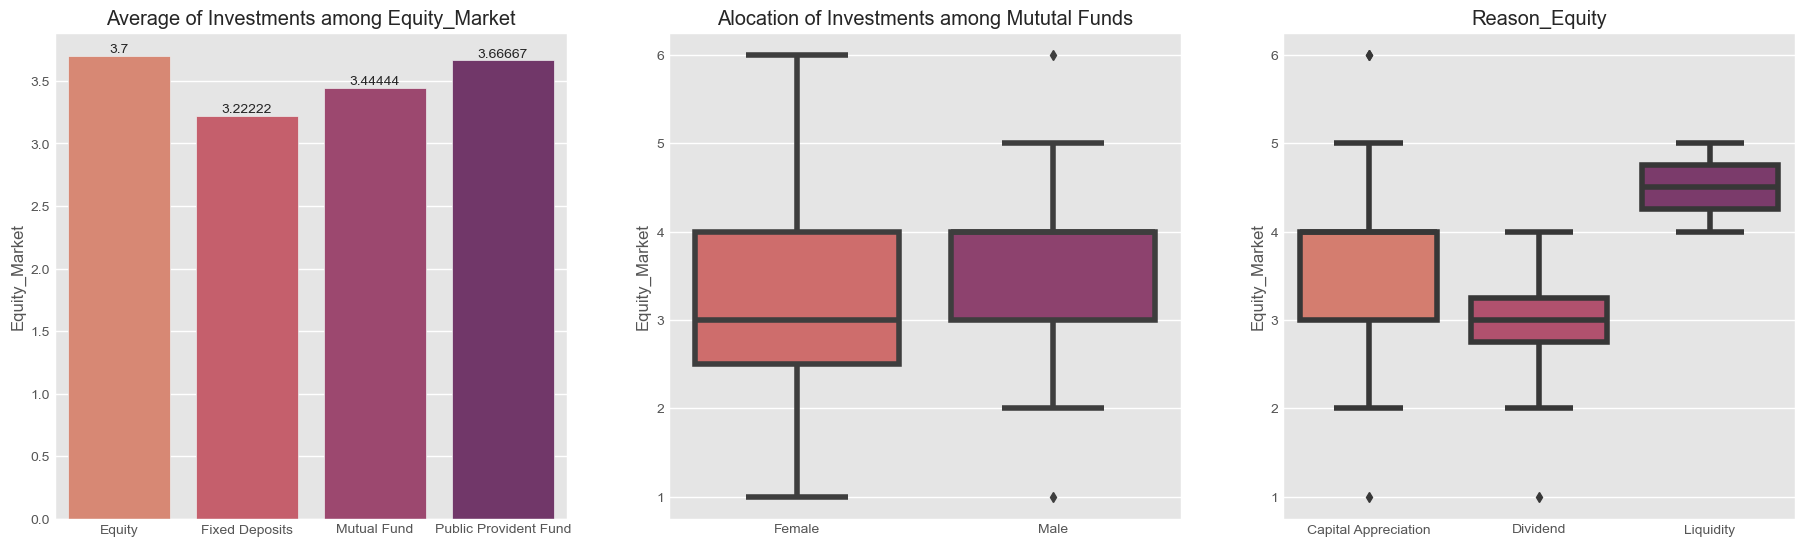

In [379]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 rows, 2 column


# Group by 'Avenue' and calculate the average of Equity_Market for each group
average_allocation = imputed_finance.groupby('Avenue')['Equity_Market'].mean().reset_index()

fig4 = sns.barplot(data=average_allocation,
            y='Equity_Market', 
            x='Avenue',
            ax= axes[0],
            palette = "flare")

fig4.bar_label(fig4.containers[0], fontsize=10)
fig4 .set_title('Average of Investments among Equity_Market')
fig4.set(xlabel ='')

fig5= sns.boxplot(data=imputed_finance,
            y='Equity_Market', 
            x='gender',
            ax= axes[1],
            palette= "flare")
fig5.set_title('Alocation of Investments among Mututal Funds')
fig5.set(xlabel ='')

fig3= sns.boxplot(data=imputed_finance,
            y='Equity_Market', 
            x='Reason_Equity',
            ax= axes[2],
            palette= "flare")
fig3.set_title('Reason_Equity')
fig3.set(xlabel ='')

plt.ylabel('Equity_Market')
plt.xticks(rotation=0)
plt.show()

- The average investments type within equite marker are witin the range of 3.2 and 3.7, with similar average values across the investment types.

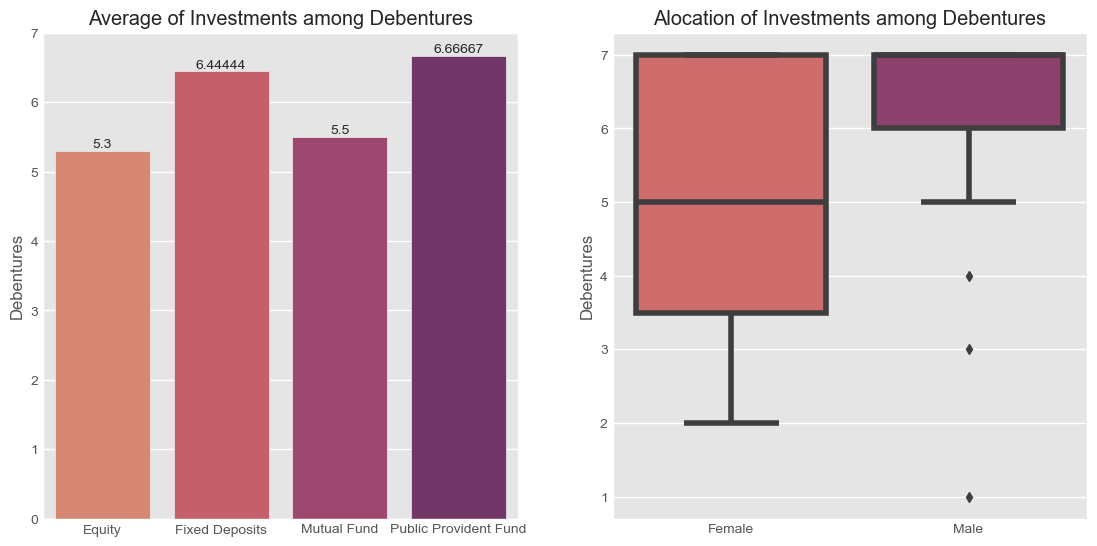

In [380]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 rows, 2 column


# Group by 'Avenue' and calculate the average of 'Debentures' for each group
average_allocation = imputed_finance.groupby('Avenue')['Debentures'].mean().reset_index()

fig4 = sns.barplot(data=average_allocation,
            y='Debentures', 
            x='Avenue',
            ax= axes[0],
            palette = "flare")

fig4.bar_label(fig4.containers[0], fontsize=10)
fig4 .set_title('Average of Investments among Debentures')
fig4.set(xlabel ='')

fig3= sns.boxplot(data=imputed_finance,
            y='Debentures', 
            x='gender',
            ax= axes[1],
            palette= "flare")
fig3.set_title('Alocation of Investments among Debentures')
fig3.set(xlabel ='')

plt.ylabel('Debentures')
plt.xticks(rotation=0)
plt.show()

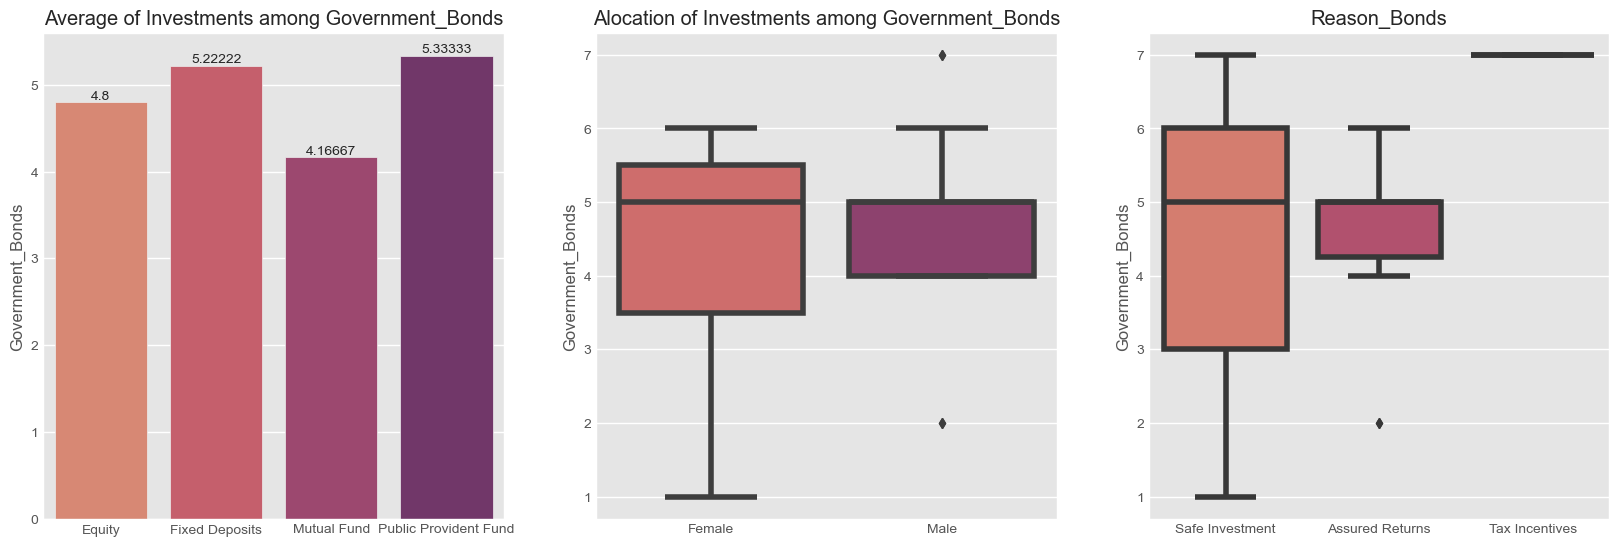

In [381]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 rows, 2 column


# Group by 'Avenue' and calculate the average of 'Government_Bonds' for each group
average_allocation = imputed_finance.groupby('Avenue')['Government_Bonds'].mean().reset_index()

fig4 = sns.barplot(data=average_allocation,
            y='Government_Bonds', 
            x='Avenue',
            ax= axes[0],
            palette = "flare")

fig4.bar_label(fig4.containers[0], fontsize=10)
fig4 .set_title('Average of Investments among Government_Bonds')
fig4.set(xlabel ='')

fig3= sns.boxplot(data=imputed_finance,
            y='Government_Bonds', 
            x='gender',
            ax= axes[1],
            palette= "flare")
fig3.set_title('Alocation of Investments among Government_Bonds')
fig3.set(xlabel ='')

fig5= sns.boxplot(data=imputed_finance,
            y='Government_Bonds', 
            x='Reason_Bonds',
            ax= axes[2],
            palette= "flare")
fig5.set_title('Reason_Bonds')
fig5.set(xlabel ='')

plt.ylabel('Government_Bonds')
plt.xticks(rotation=0)
plt.show()

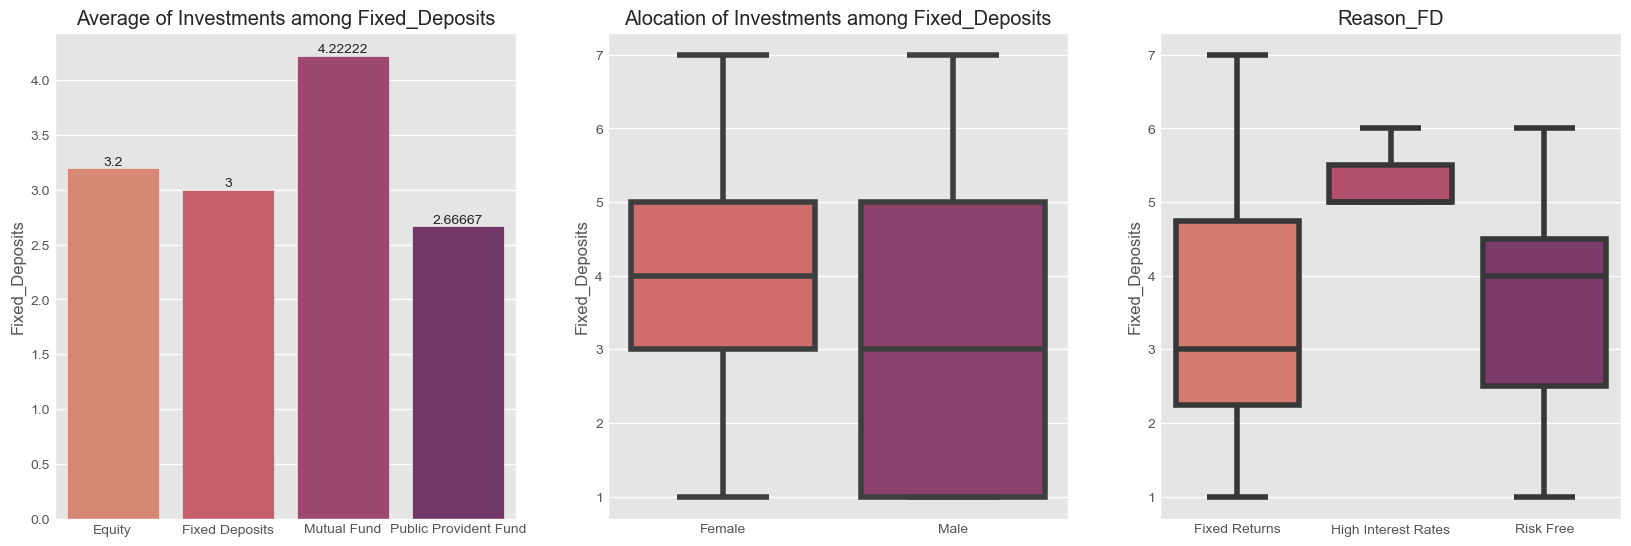

In [382]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 rows, 2 column


# Group by 'Avenue' and calculate the average of 'Fixed_Deposits' for each group
average_allocation = imputed_finance.groupby('Avenue')['Fixed_Deposits'].mean().reset_index()

fig4 = sns.barplot(data=average_allocation,
            y='Fixed_Deposits', 
            x='Avenue',
            ax= axes[0],
            palette = "flare")

fig4.bar_label(fig4.containers[0], fontsize=10)
fig4 .set_title('Average of Investments among Fixed_Deposits')
fig4.set(xlabel ='')

fig3= sns.boxplot(data=imputed_finance,
            y='Fixed_Deposits', 
            x='gender',
            ax= axes[1],
            palette= "flare")
fig3.set_title('Alocation of Investments among Fixed_Deposits')
fig3.set(xlabel ='')

fig5= sns.boxplot(data=imputed_finance,
            y='Fixed_Deposits', 
            x='Reason_FD',
            ax= axes[2],
            palette= "flare")
fig5.set_title('Reason_FD')
fig5.set(xlabel ='')

plt.ylabel('Fixed_Deposits')
plt.xticks(rotation=0)
plt.show()

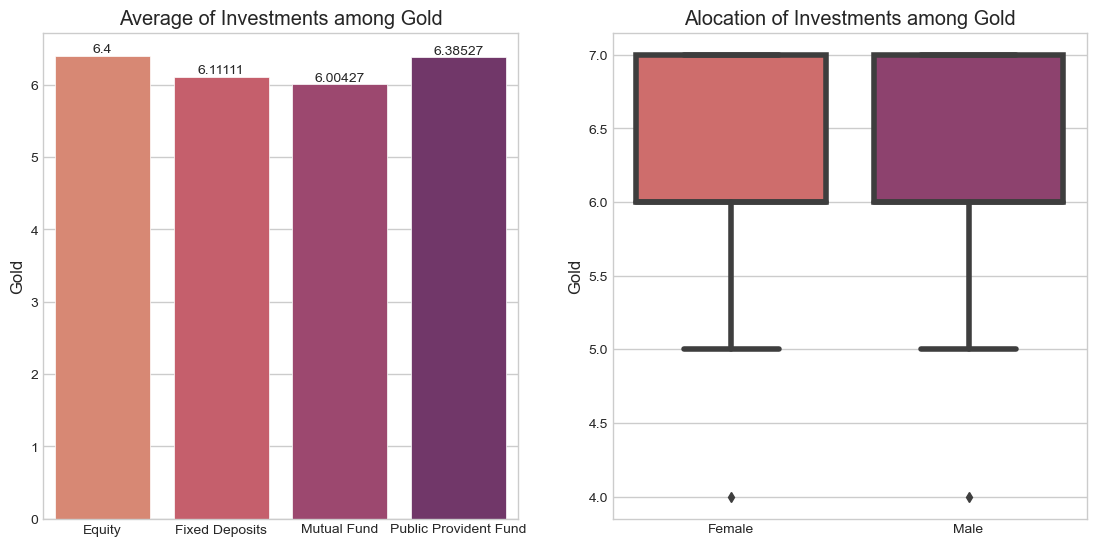

In [298]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 rows, 2 column


# Group by 'Avenue' and calculate the average of 'Gold' for each group
average_allocation = imputed_finance.groupby('Avenue')['Gold'].mean().reset_index()

fig4 = sns.barplot(data=average_allocation,
            y='Gold', 
            x='Avenue',
            ax= axes[0],
            palette = "flare")

fig4.bar_label(fig4.containers[0], fontsize=10)
fig4 .set_title('Average of Investments among Gold')
fig4.set(xlabel ='')

fig3= sns.boxplot(data=imputed_finance,
            y='Gold', 
            x='gender',
            ax= axes[1],
            palette= "flare")
fig3.set_title('Alocation of Investments among Gold')
fig3.set(xlabel ='')

plt.ylabel('Gold')
plt.xticks(rotation=0)
plt.show()

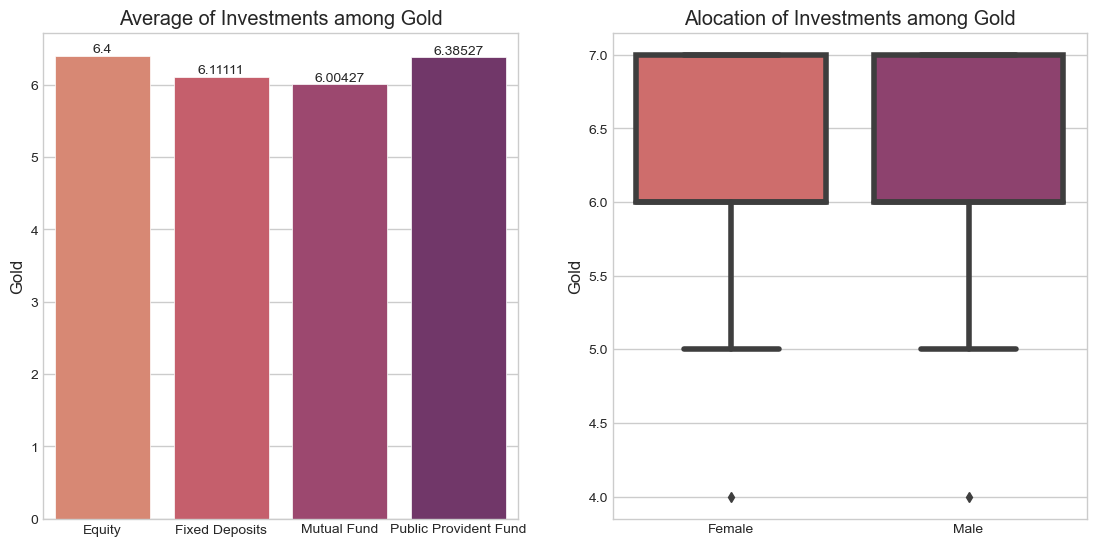

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 rows, 2 column


# Group by 'Avenue' and calculate the average of 'Gold' for each group
average_allocation = imputed_finance.groupby('Avenue')['Gold'].mean().reset_index()

fig4 = sns.barplot(data=average_allocation,
            y='Gold', 
            x='Avenue',
            ax= axes[0],
            palette = "flare")

fig4.bar_label(fig4.containers[0], fontsize=10)
fig4 .set_title('Average of Investments among Gold')
fig4.set(xlabel ='')

fig3= sns.boxplot(data=imputed_finance,
            y='Gold', 
            x='gender',
            ax= axes[1],
            palette= "flare")
fig3.set_title('Alocation of Investments among Gold')
fig3.set(xlabel ='')

plt.ylabel('Gold')
plt.xticks(rotation=0)
plt.show()

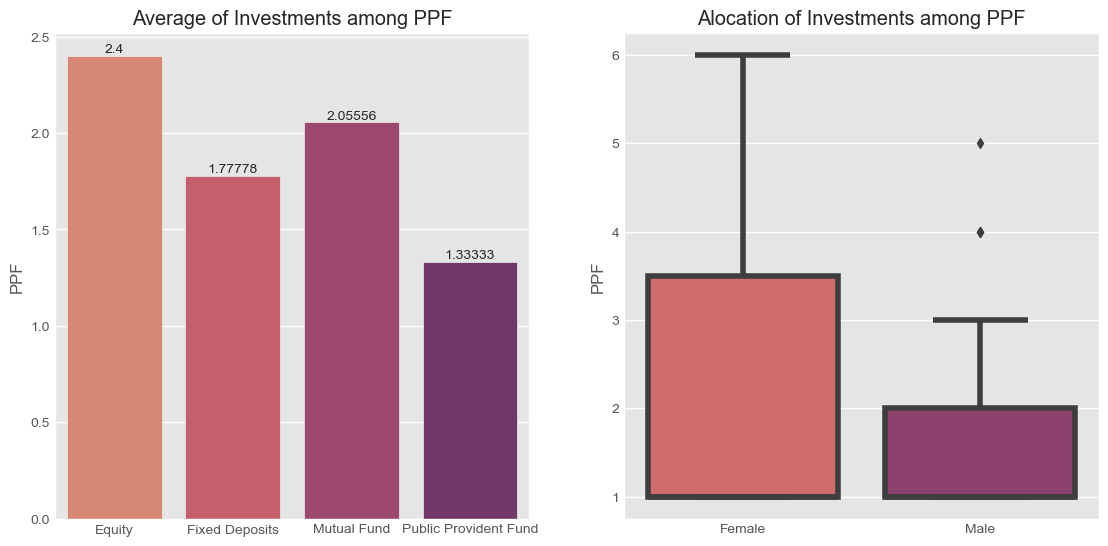

In [384]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 rows, 2 column


# Group by 'Avenue' and calculate the average of 'PPF' for each group
average_allocation = imputed_finance.groupby('Avenue')['PPF'].mean().reset_index()

fig4 = sns.barplot(data=average_allocation,
            y='PPF', 
            x='Avenue',
            ax= axes[0],
            palette = "flare")

fig4.bar_label(fig4.containers[0], fontsize=10)
fig4 .set_title('Average of Investments among PPF')
fig4.set(xlabel ='')

fig3= sns.boxplot(data=imputed_finance,
            y='PPF', 
            x='gender',
            ax= axes[1],
            palette= "flare")
fig3.set_title('Alocation of Investments among PPF')
fig3.set(xlabel ='')

plt.ylabel('PPF')
plt.xticks(rotation=0)
plt.show()

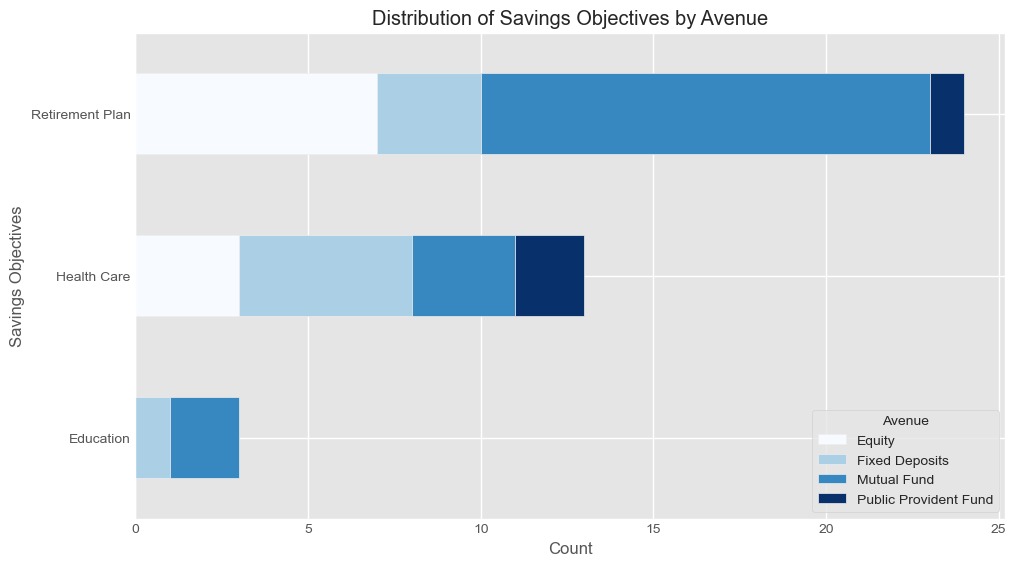

In [405]:
#Find the distribution of avenues across the savings objectives
plot = imputed_finance.groupby(['Savings_Objectives', 'Avenue'])['Savings_Objectives']\
    .count().unstack()\
    .plot(kind='barh',
          stacked=True, 
          colormap='Blues', 
          figsize=(10, 6))

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Savings Objectives')
plt.title('Distribution of Savings Objectives by Avenue')

# Customize legend
plt.legend(title='Avenue', loc='lower right')

plt.show()

### Are there differences in investment duration based on savings objectives?

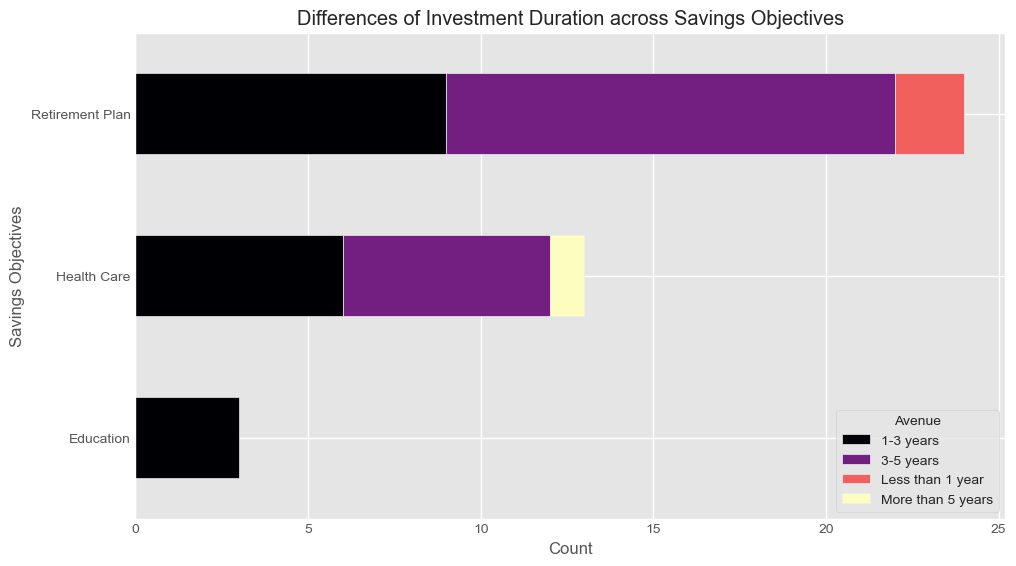

In [419]:
#Find the differences of investment duration across the savings objectives
plot = imputed_finance.groupby(['Savings_Objectives', 'Duration'])['Savings_Objectives']\
    .count().unstack()\
    .plot(kind='barh',
          stacked=True, 
          colormap='magma', 
          figsize=(10, 6))

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Savings Objectives')
plt.title('Differences of Investment Duration across Savings Objectives')

# Customize legend
plt.legend(title='Avenue', loc='lower right')

plt.show()

#### The reason most people are investing (savings_objective)

Text(0.5, 1.0, 'Expectations')

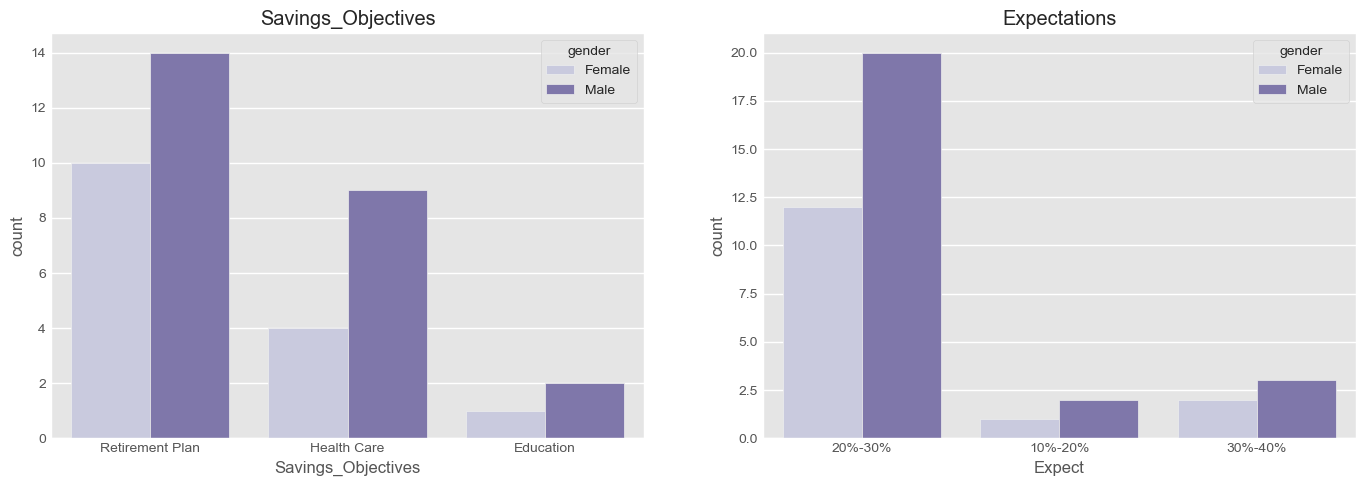

In [383]:
#Saving objectivs
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.countplot(ax=axes[0], 
              x=imputed_finance['Savings_Objectives'],
              hue = imputed_finance['gender'],
              palette= 'Purples')

axes[0].set_title('Savings_Objectives')

sns.countplot(ax=axes[1], 
              x=imputed_finance['Expect'],
              hue = imputed_finance['gender'],
              palette= 'Purples')

axes[1].set_title('Expectations')

- People starts investing mostly for a retirement plan, then health care and lastly education.
- The main trend of increase in males compared to females, is mirroring on the eaving objectives.
- The expectations of most those investments are withon the 20-30% of the initial investment

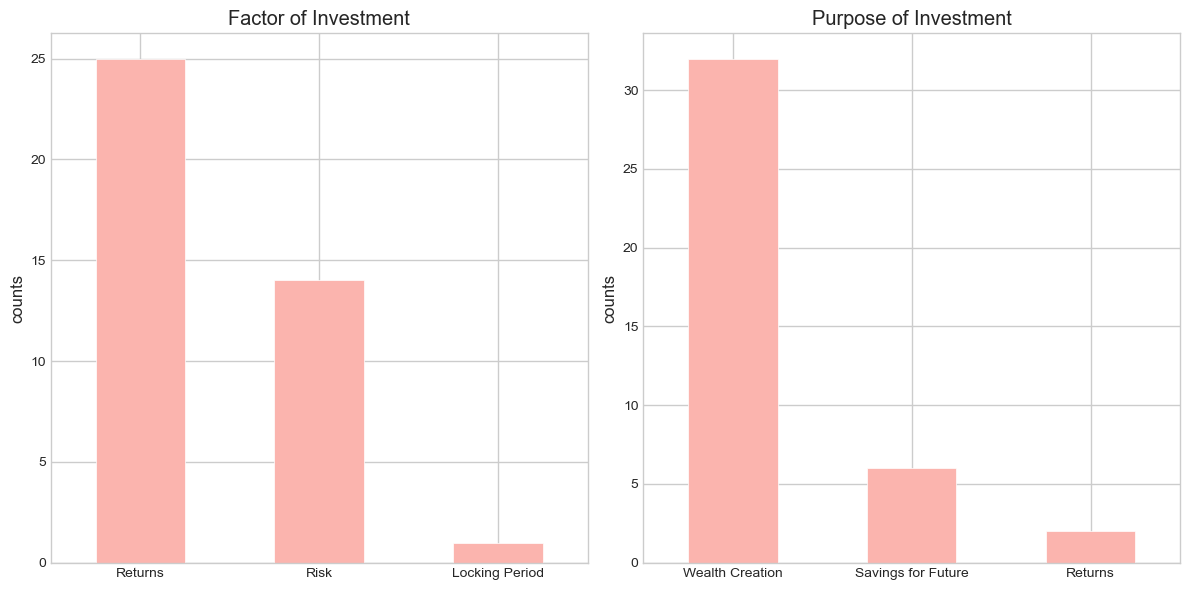

In [345]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 rows, 2 column

fig5= imputed_finance['Factor'].value_counts()\
                         .plot(kind='bar',
                               x = 'Factor',
                               colormap= "Pastel1",
                               ax= axes[0])
fig5.set_ylabel('counts')
fig5.set_title('Factor of Investment')
axes[0].tick_params(axis='x', rotation=0)  # Rotate x-axis labels for the first graph


fig6 = imputed_finance['Purpose'].value_counts()\
                         .plot(kind='bar',
                               x = 'Purpose',
                               colormap= "Pastel1",
                               ax= axes[1])
fig6.set_ylabel('counts')
fig6.set_title('Purpose of Investment')

axes[1].tick_params(axis='x', rotation=0)  # Rotate x-axis labels for the second graph
#Adjust spacing between subplots
plt.tight_layout()
plt.show() 

- A main factor affecting investments is returns follwong by risk and locking period. Thus the majority of peaple are choosing based on the strategy that brings most returns back and a decreased numver of people based on the risk of their investment.
- The majority of people are investing for wealth creation, with a small proportion people investing for saving and returns purposes.


### What is the typical duration of investments in your dataset?

Text(0.5, 1.0, 'Investmet Monitor')

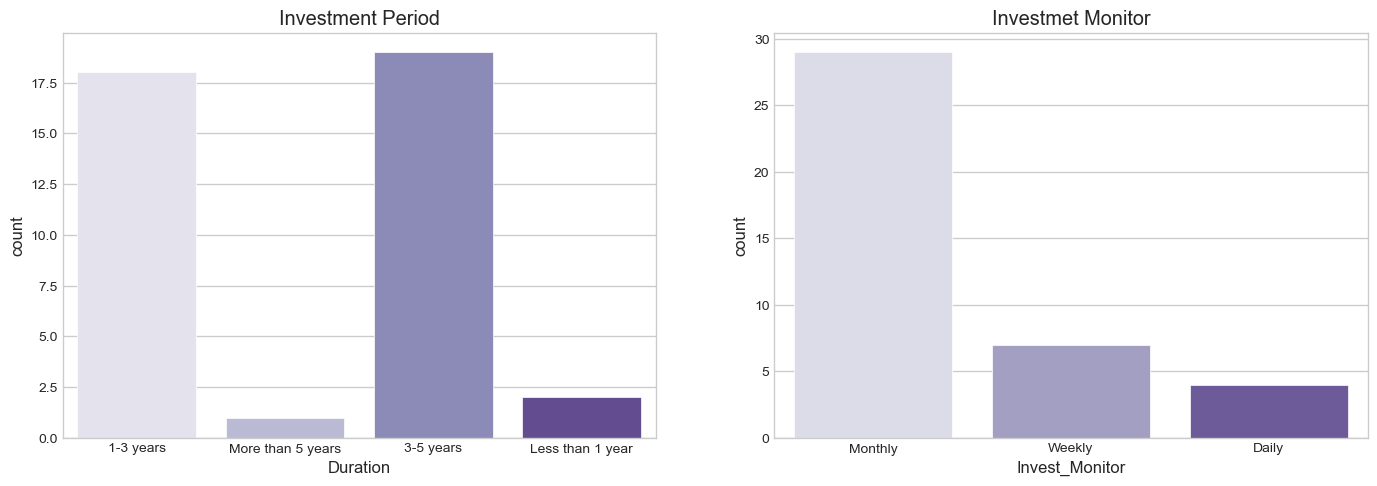

In [292]:
#Duration of invest and invest monitor
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.countplot(ax=axes[0], 
              x=imputed_finance['Duration'],
              palette= 'Purples')

axes[0].set_title('Investment Period')

sns.countplot(ax=axes[1], 
              x=imputed_finance['Invest_Monitor'],
              palette= 'Purples')

axes[1].set_title('Investmet Monitor')

- A high but equal porportion of people are investing their money for fixed periods of 1-3 years and 3-5 years. 
- The majority of investors are evaluating their investment performance every month.

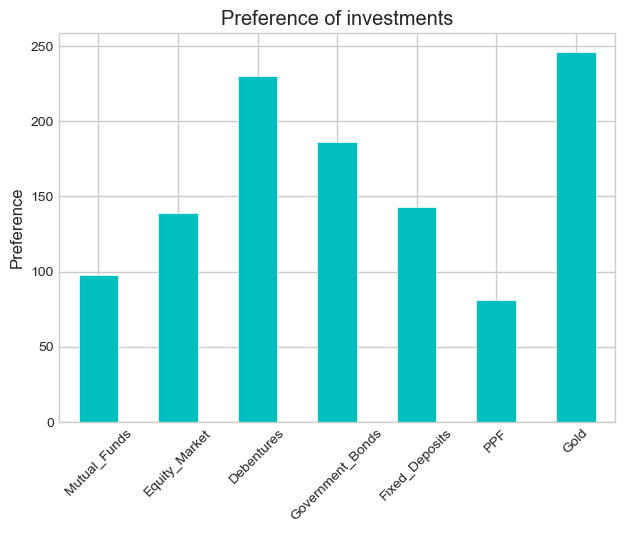

In [350]:
fig7= imputed_finance[["Mutual_Funds",
                       "Equity_Market",
                       'Debentures', 
                       'Government_Bonds', 
                       'Fixed_Deposits', 
                       'PPF', 
                       'Gold']]\
                        .sum().plot(kind='bar',
                                                                                                                                     color= "c")
plt.title('Preference of investments')
plt.tick_params(axis='x', rotation=45)  
plt.ylabel('Preference')
plt.show()

- The most prefered investment is 'Gold', 'Debentures', followed by 'Government Bonds', 'Equity Market' and 'Fixed Deposits'.

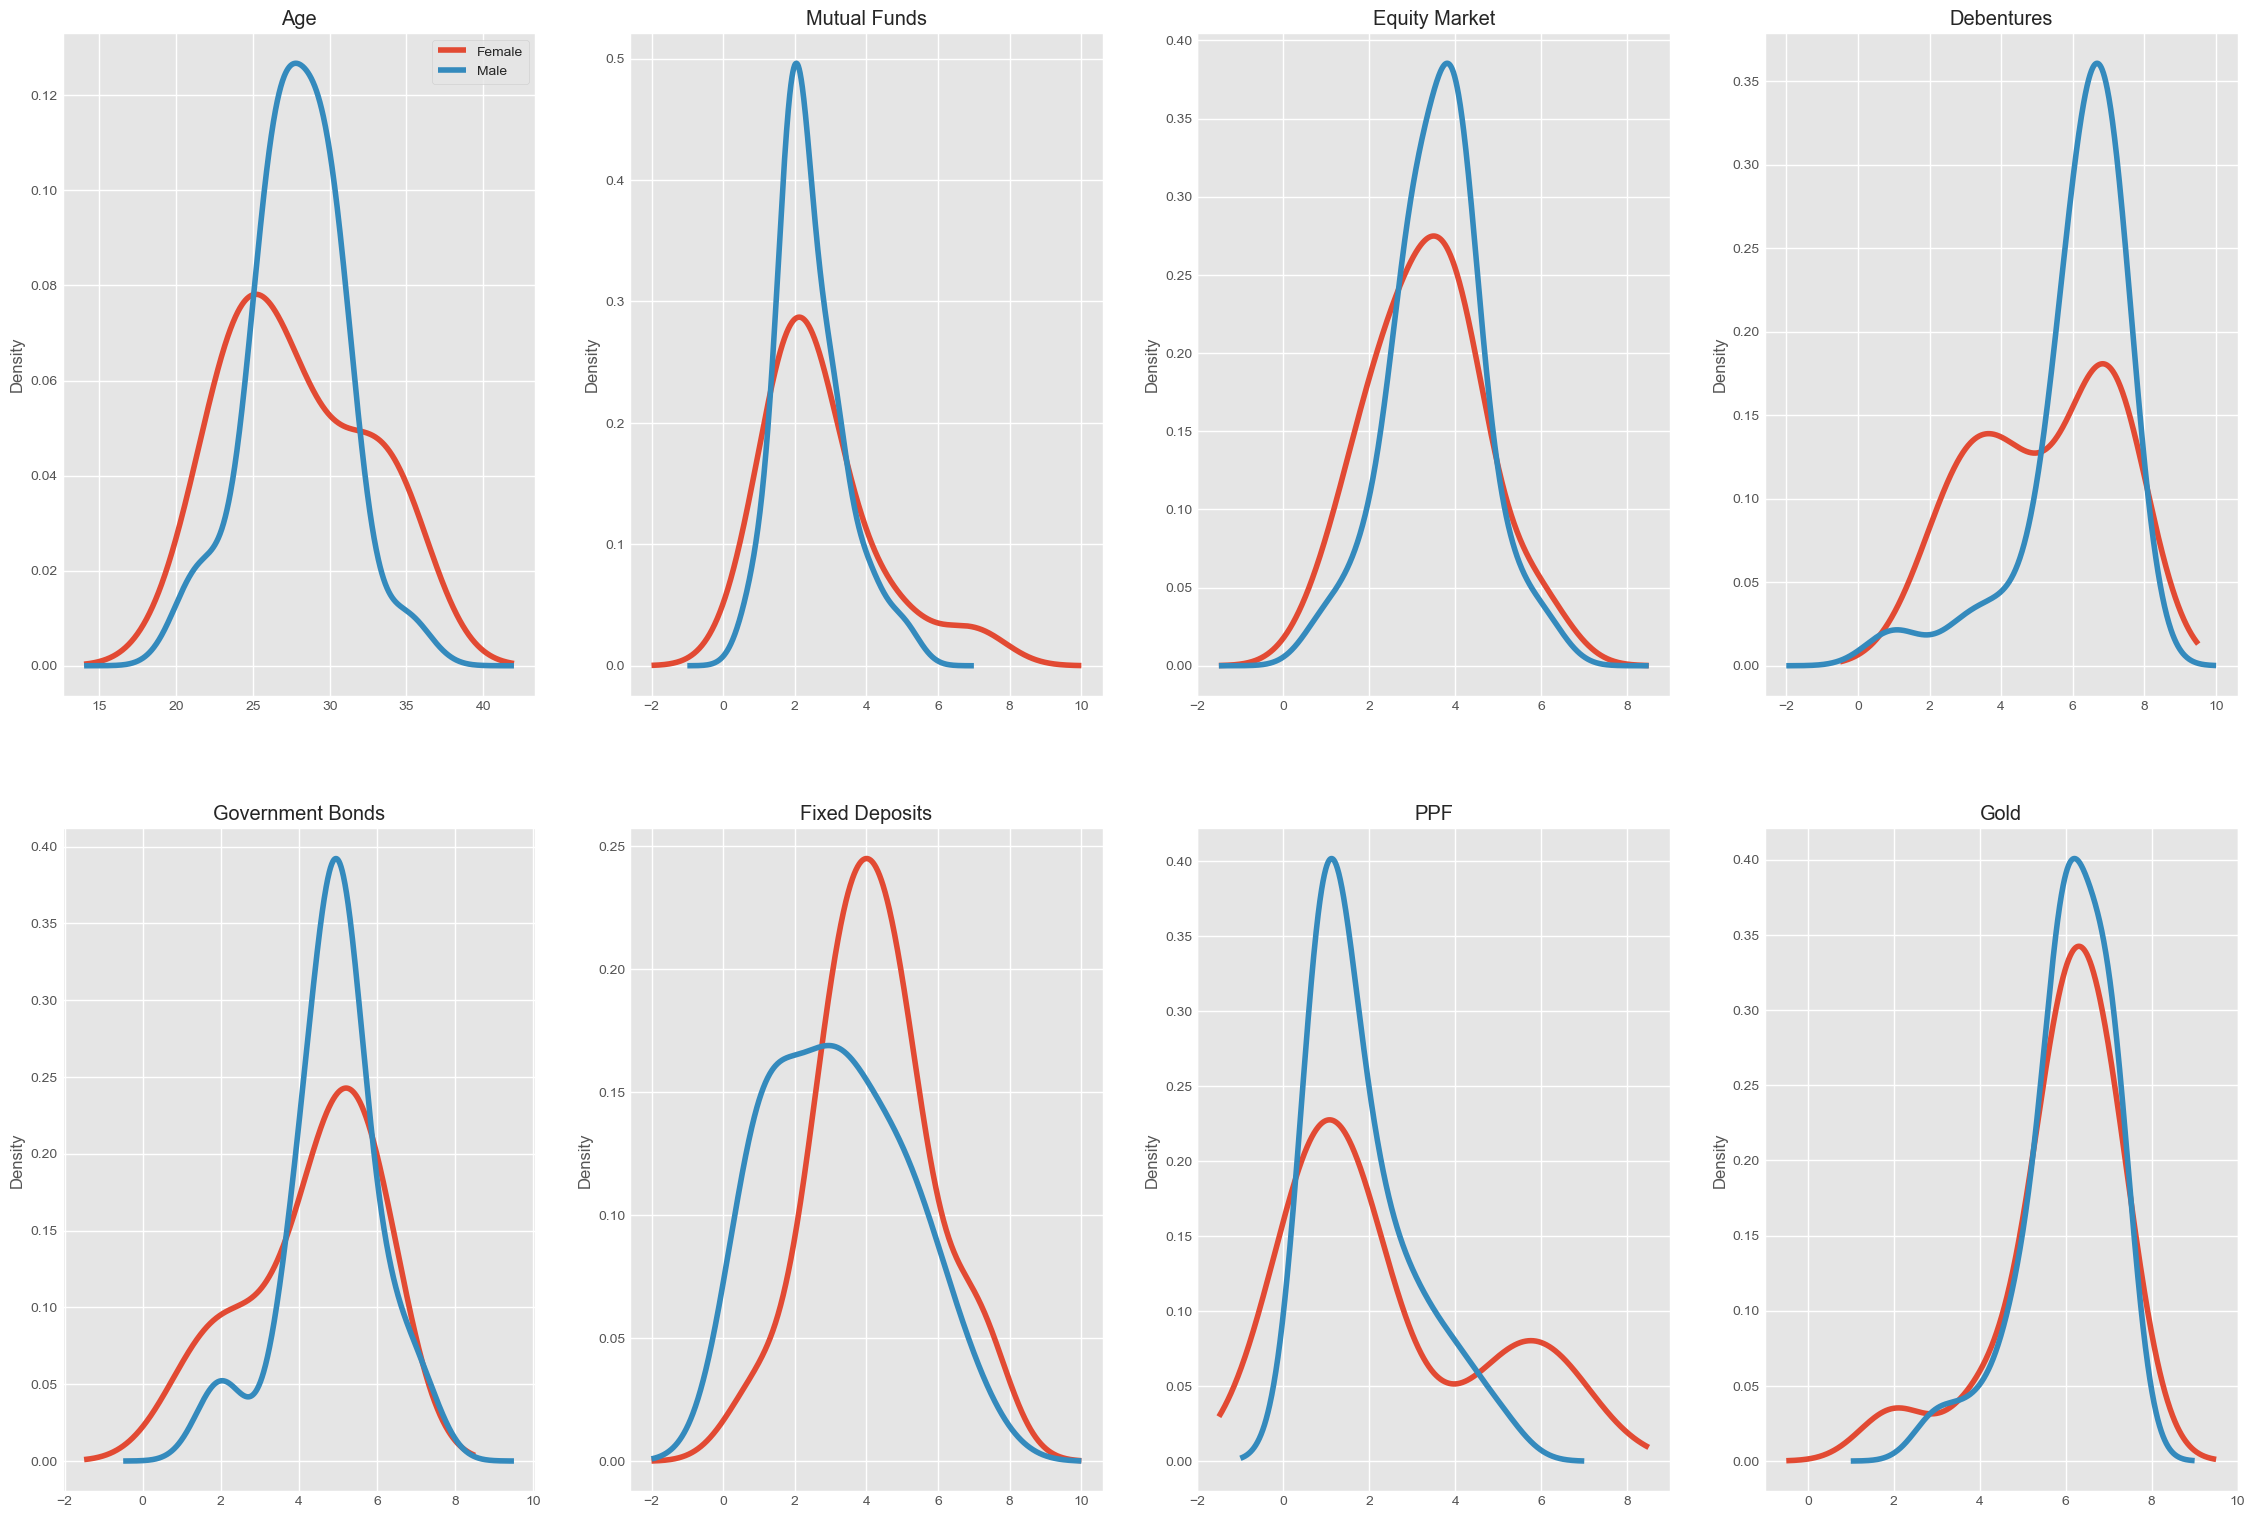

In [385]:
fig, axes = plt.subplots(2,4, figsize = (25,18))

#Show frequency age range by gender 
# 1st plot
fig1 = imputed_finance.groupby('gender').age.plot(kind='kde', 
                                          ax=axes[0,0])
axes[0,0].set_title('Age')


# 2nd plot
fig1 = imputed_finance.groupby('gender').Mutual_Funds.plot(kind='kde', 
                                          ax=axes[0,1])
axes[0,1].set_title('Mutual Funds')


# 3rd plot
fig1 = imputed_finance.groupby('gender').Equity_Market.plot(kind='kde', 
                                          ax=axes[0,2])
axes[0,2].set_title('Equity Market')


# 4th plot
fig1 = imputed_finance.groupby('gender').Debentures.plot(kind='kde', 
                                          ax=axes[0,3])
axes[0,3].set_title('Debentures')



# 5th plot
fig1 = imputed_finance.groupby('gender').Government_Bonds.plot(kind='kde', 
                                          ax=axes[1,0])
axes[1,0].set_title('Government Bonds')


# 6th plot
fig1 = imputed_finance.groupby('gender').Fixed_Deposits.plot(kind='kde', 
                                          ax=axes[1,1])
axes[1,1].set_title('Fixed Deposits')


# 7th plot
fig1 = imputed_finance.groupby('gender').PPF.plot(kind='kde', 
                                          ax=axes[1,2])
axes[1,2].set_title('PPF')


# 8th plot
fig1 = imputed_finance.groupby('gender').Gold.plot(kind='kde', 
                                          ax=axes[1,3])
axes[1,3].set_title('Gold')
axes[0,0].legend()


### Conclusions:
- People who are investors in the dataset are between the ages of 25 and 31. 
- The majority of investors in this database are males.
- The 2 significant differences in inventions demographics are 'Debentures' and 'PPF', with females investing lower in 'Debentures' and higher in 'PPF' than males, respectively.
- The total preferences in investments are also likely to invest in Gold and Debentures. 
- The length of time that money is held in any investment instrument determines whether it is middle-term (1-3 years) or long-term investing (3-5 years). 
- In addition, most people keep track of their finances on a monthly basis.
- In general, most peaple are investing to create wealth for their retirment.
- The majority of people are investing having in mind the returns of their investments, following by risks adn they are expecting around 20-30% gains.
- Mututal funds investment avenue seems to be associated mostly with Retirement plans savings objectives.
- The main reason most people are investing in fixed deposits is the High Interest Rate.
- People investing in Reason Bonds mostly because of tax incentives followed by safe investment
- The main reason people invest in equity and mutual is tmainly Liquidy 

